# The Goal ?

## *Build a model that predict a disease based on symptom Description*

###The Approach:
  *1- Understand and explore the information in the DataSet:*

      • Upload necessarily libaries and Read the DataSet File.
      • Display a sample of the DataSet to understand it's Column And Rows and check the Data types.
      • Check for any missing values or duplicates.
      • identify what is the target vairiable and features ?.
      • check the distribution of the diseases.

  *2- Exploratory Data Analysis (EDA):*

      • Are some disease more frequent than otheres ? is there disease with few samples ?
      • Relationship between symptoms and diseases.
      • Word Frequency Across all Symptoms.
      • Check for Outliers And Noise.
      
  *3- Preprocessing the Text Data:*

      • Rename columns for more code readability and remove irrelevant columns.
      • LowerCasing to ensure uniformity.
      • Noise Removal
          if there is numbers are they valuable ?.
          Remove unnecessary punctuation/special characters selectively.
      • Split the text into smaller pieces (Tokenization).
      • Check if Stopword removal is needed and applied if it is.
      • Reduce the word to their base root by using Lemmatization or Stemming.
      • Rebuild the tokens back into sentences.
      • Save Preprocessed Data and Logs.


  *4- Feature Engineering:*

      • Analyze the symptom descriptions to understand vocabulary size and word distribution.
      • I will use TF-IDF and FastText.
      • Apply TF-IDF to the Symptoms column and transform it into a numerical matrix.
      • Use ngram_range to capture single words and word pairs (e.g., (1, 2)).
      • Check the shape of the matrix to ensure it looks correct.
      • Inspect the most important words based on TF-IDF scores to understand the output.
      • Encode the Disease column
      • Save the transformed data and feature names for modeling.

  *5- Splitting the DataSet:*
   
      • Training Dataset to train the model.
      • Testing DataSet to test the model.

  *6- Model Selection And Training:*


      • Identify which model works better with text data ?.
      • Apply Evaluation metrics to evaluate the model preformance.


  

### 1- Understand and explore the information in the DataSet

#### 1.1
Upload necessarily libaries and Read the DataSet File.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy


#### 1.2
Display a sample of the DataSet to understand it's Column And Rows and check the Data types.

In [ ]:
dataset = pd.read_csv("/content/Symptom2Disease.csv")
df = pd.DataFrame(dataset)

print("DataSet Shape:", df.shape)
print("DataSet Types:\n", df.dtypes)
df.sample(10)

DataSet Shape: (1200, 3)
DataSet Types:
 Unnamed: 0     int64
label         object
text          object
dtype: object


,Unnamed: 0,label,text
216,216,Impetigo,"I have a high fever every night and developed sores on my face, particularly near my nose. I have noticed that the sores are taking longer to heal and are more prone to infection."
616,16,Bronchial Asthma,"I've been experiencing a high fever, a persistent cough, and shortness of breath. I've also been producing a lot of thick, mucoid sputum, and I'm feeling very tired and weak."
1197,297,diabetes,I regularly experience these intense urges and the want to urinate. I frequently feel drowsy and lost. I've also significantly lost my vision.
242,242,Impetigo,"Over the last two days, the rash on my face has gotten more severe and inflamed, and the blisters have begun to bleed clear pus. It is really painful to deal with."
273,273,Dengue,"I've been suffering from significant joint pain, which makes it difficult for me to walk and carry out my everyday tasks. I've also lost my appetite, which makes me feel weak and feel like vomitting."
1129,229,peptic ulcer disease,"I unknowingly lose weight and find it difficult to gain weight. To relieve the pain and discomfort I feel, I take antacids. My mouth hurts so much."
904,4,urinary tract infection,"My pee looks cloudy and has storng and foul smell. I frequently get an urge to urinate at night, and have been getting high temperatures since these symptoms strted showing"
97,97,Varicose Veins,"My legs' skin around the veins is unusual. There appears to be a large bruise. Nowadays, I get frequent cramps when I sprint or run."
853,253,Malaria,"Strong itchiness, chills, nausea, and a high temperature have been plaguing me. Besides having a headache, I'm also perspiring a lot. My muscles are quite sore, and I feel sick."
49,49,Psoriasis,"Because of dry, flaky areas on my skin, I am prone to infections. My joints are in extreme pain . My knees and elbows' skin are starting to peel off."


#### 1.3
Check for any missing values or duplicates.

In [ ]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

Missing Values:
 Unnamed: 0    0
label         0
text          0
dtype: int64
Duplicates: 0


#### 1.4
identify what is the target vairiable and features ?.

Target Vairiable = Label(which represent the disease)

Features = text(which represent the symptoms)

In [ ]:
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
1,1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
2,2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
3,3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
4,4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."


understanding of the length of text in the DataSets

In [ ]:
text = df['text']

number_of_words = []
for i in text:
  number_of_words.append(len(i.split()))

df2 = pd.DataFrame(number_of_words)
df2.describe()


,0
count,1200.000000
mean,30.725000
std,6.707225
min,12.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,55.000000


#### 1.5
check the distribution of the diseases.

As shown below the dataset is well distributed where each disease have 50 sample

In [ ]:
df['label'].value_counts()

,count
label,
Psoriasis,50
Varicose Veins,50
Typhoid,50
Chicken pox,50
Impetigo,50
Dengue,50
Fungal infection,50
Common Cold,50
Pneumonia,50


### **2- Exploratory Data Analysis (EDA)**

#### 2.1

Are some disease more frequent than otheres ? is there disease with few samples ?

From the historgram we can see that the dataset is well maintained there is no disease with few samples.

  


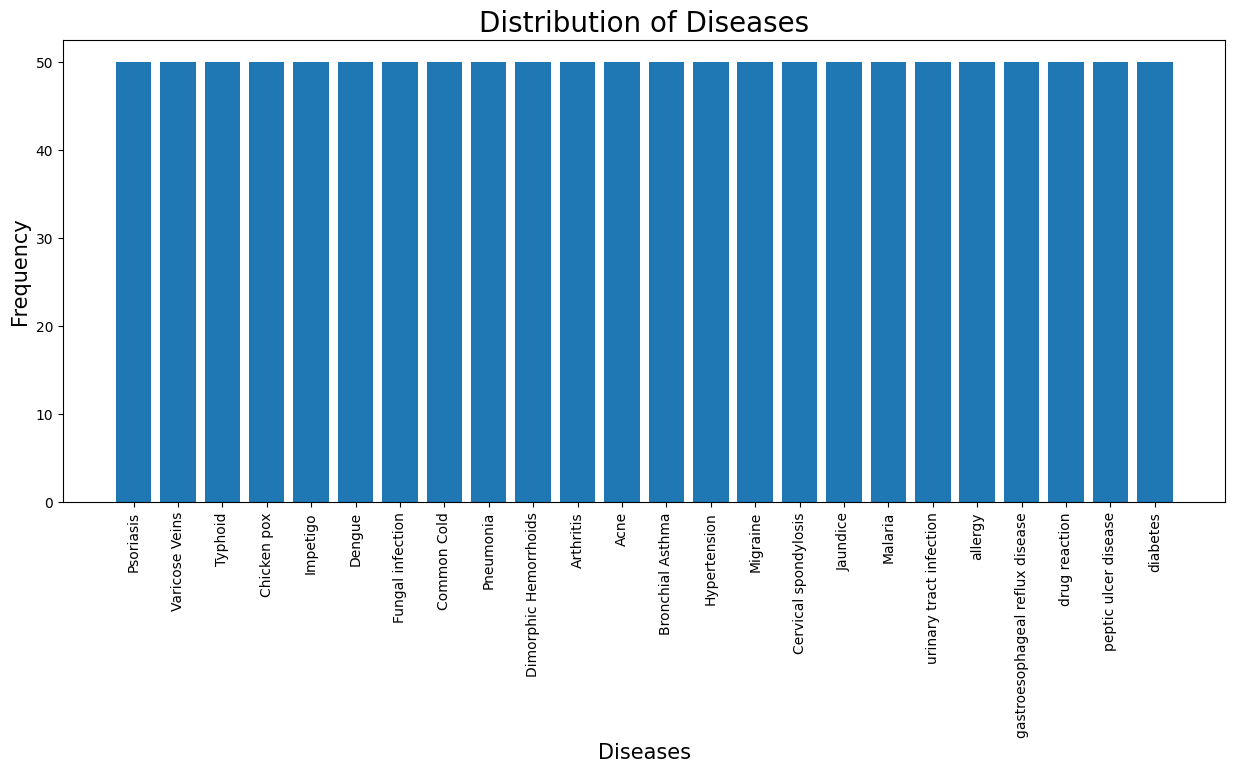

In [ ]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(15, 6))

plt.bar(label_counts.index, label_counts)
plt.xticks(rotation=90)

plt.title("Distribution of Diseases", fontsize = 20)
plt.xlabel("Diseases", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

#### 2.2

Relationship between symptoms and diseases.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-2707808803.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette="viridis")


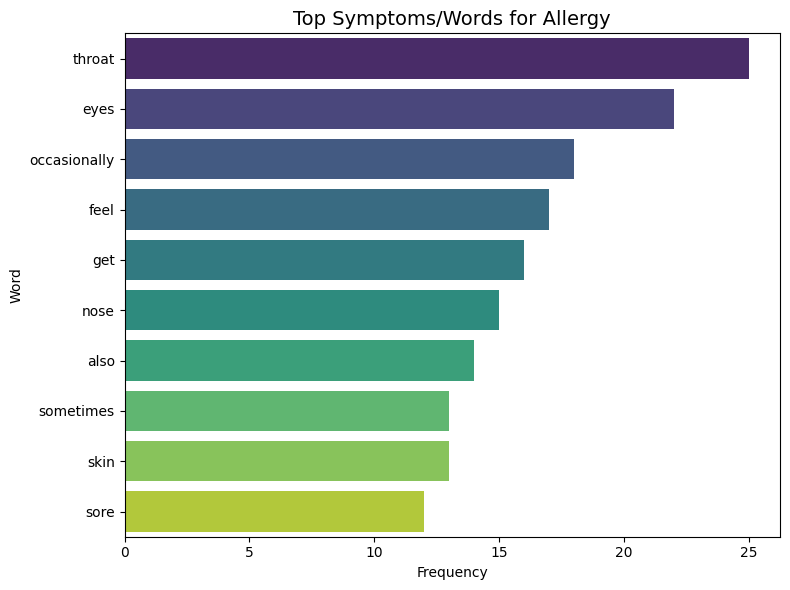

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

grouped_symptoms = df.groupby('label')

disease_word_freq = {}

for disease, group in grouped_symptoms:
    combined_text = ' '.join(group['text'])
    tokens = word_tokenize(combined_text.lower())
    clean_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    word_count = Counter(clean_tokens)
    disease_word_freq[disease] = word_count.most_common(10)

disease = 'allergy'
words, counts = zip(*disease_word_freq[disease])

plt.figure(figsize=(8, 6))
sns.barplot(y=list(words), x=list(counts), palette="viridis")

plt.title(f"Top Symptoms/Words for {disease.capitalize()}", fontsize=14)

plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


Another visulization using wordcloud

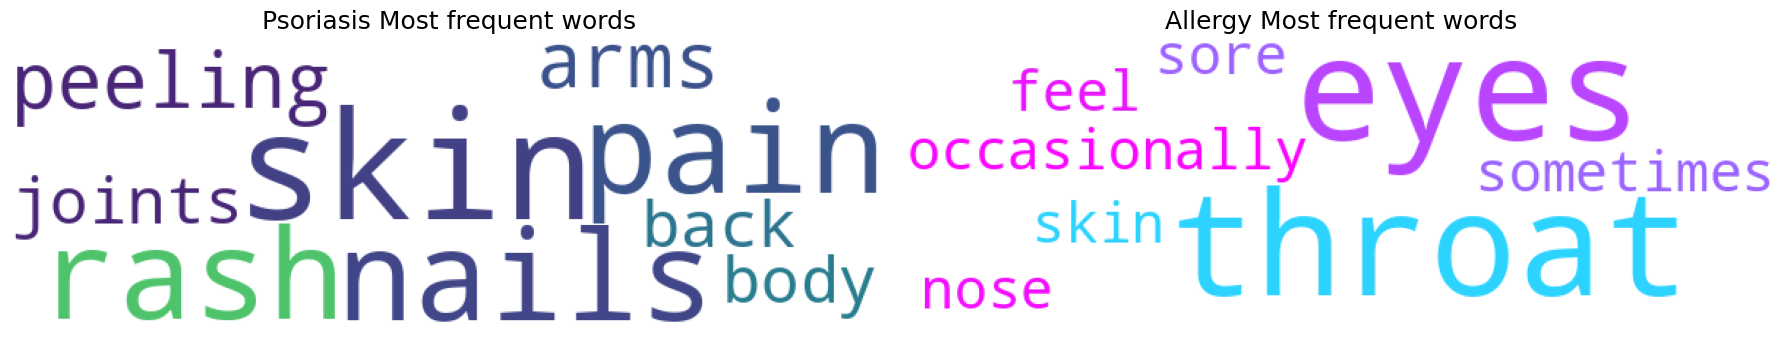

In [ ]:
from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[18, 8])

wordcloud = WordCloud(width=600, height=200, background_color='white',  colormap='viridis', min_font_size=10,).generate(' '.join([word for word, freq in disease_word_freq['Psoriasis']]))

ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Psoriasis Most frequent words',fontsize=18);

wordcloud2 = WordCloud(width=600, height=200, background_color='white',  colormap='cool' ,  min_font_size=10).generate(' '.join([word for word, freq in disease_word_freq['allergy']]))

ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Allergy Most frequent words',fontsize=18);

plt.tight_layout()
plt.show()

####2.3
Word Frequency Across all Symptoms to figure out if there is some words that will dominate the chart

from the chart we know that we must use stopwords removal during preprocessing



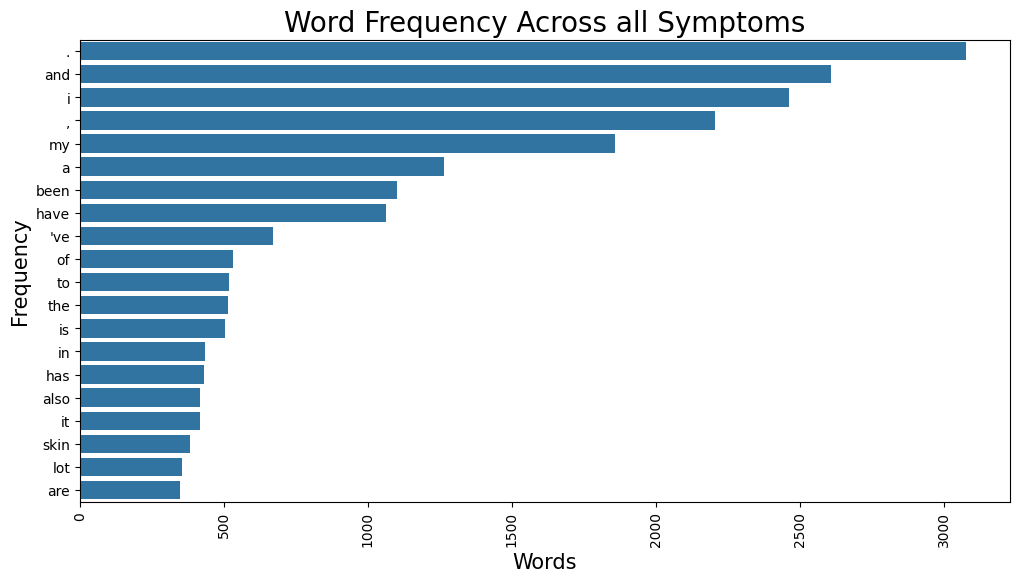

In [ ]:
tokinized_text = []
for i in df['text']:
  tokinized_text.append(word_tokenize(i.lower()))

flattened_list = [word for sublist in tokinized_text for word in sublist]

word_count = Counter(flattened_list)

most_common_words = word_count.most_common(20)

words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(y=list(words), x=list(counts))

plt.xticks(rotation=90)
plt.title("Word Frequency Across all Symptoms", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

plt.show()

####2.4

Check for Outliers And Noise.

by cheking the text length we will see if there is outliers text to deal with them in the preprocessing phase.

for ex: text contain 3-5 words or 100 words.

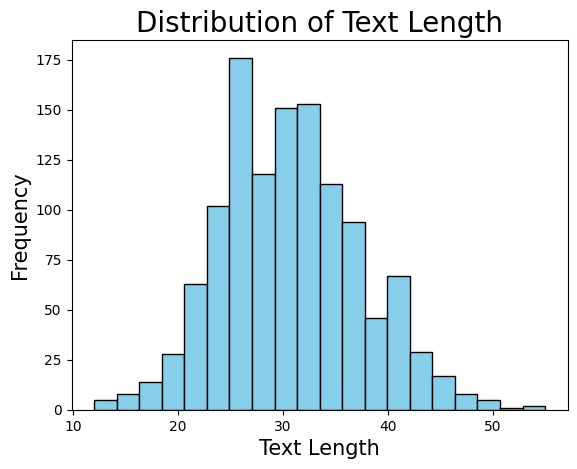

In [ ]:
text_lengths = df['text'].apply(lambda x: len(x.split()))

plt.hist(text_lengths, bins = 20 , color = 'skyblue', edgecolor = 'black')


plt.title("Distribution of Text Length", fontsize = 20)
plt.xlabel("Text Length", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

plt.show()

Short texts outliers

None

In [ ]:
short_texts = df[df['text'].apply(lambda x: len(x.split()) < 5)]
print("Short Texts:" )

short_texts

Short Texts:


,Unnamed: 0,label,text


Long texts ouliers

After reading these 3 text i decided to keep them as they are since there isn't any unrelated or irrelevant words instead the symptoms are detailen in plain language

In [ ]:
pd.set_option('display.max_colwidth', None)

long_texts = df[df['text'].apply(lambda x: len(x.split()) > 50)]
print("Long Texts:" )
long_texts

Long Texts:


,Unnamed: 0,label,text
369,69,Common Cold,"My eyes are always red and itchy, and my nose feels all stuffy and congested. I just feel kind of sick and tired all the time, and I keep coughing up all this gunk. My throat feels sore and scratchy, and I've noticed that the bumps on my neck are bigger than usual"
618,18,Bronchial Asthma,"I've had this cough that's been lingering for days and difficulty breathing. My fever is sky-high, and I'm feeling so weak and tired. I've also been producing a lot of mucus when I cough, and it's just been so overwhelming to deal with all of these symptoms. I'm getting so frustrated with all of this."
619,19,Bronchial Asthma,"I've had a persistent cough for days, and I also have breathing problems. I'm so weak and exhausted, and my fever is through the roof. It's been very difficult to manage all of these symptoms, and I've also been coughing up a lot of mucus. I'm becoming so angry over everything."


### **3- Text Preprocessing**

####3.1
Make a copy of the original Dataset.

Rename columns for more code readability and remove irrelevant columns.


In [ ]:
df2 = df.copy()

df2.rename(columns={'label': 'Disease', 'text': 'Symptoms', 'input_with_ner':'NER'}, inplace=True)
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2.head()

,Disease,Symptoms
0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."


####3.2
LowerCasing to ensure uniformity.



In [ ]:
df.head(10)

,Unnamed: 0,label,text
0,0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
1,1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
2,2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
3,3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
4,4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."
5,5,Psoriasis,The skin on my palms and soles is thickened and has deep cracks. These cracks are painful and bleed easily.
6,6,Psoriasis,"The skin around my mouth, nose, and eyes is red and inflamed. It is often itchy and uncomfortable. There is a noticeable inflammation in my nails."
7,7,Psoriasis,My skin is very sensitive and reacts easily to changes in temperature or humidity. I often have to be careful about what products I use on my skin.
8,8,Psoriasis,"I have noticed a sudden peeling of skin at different parts of my body, mainly arms, legs and back. Also, I face severe joint pain and skin rashes."
9,9,Psoriasis,"The skin on my genitals is red and inflamed. It is often itchy, burning, and uncomfortable. There are rashes on different parts of the body too."


In [ ]:
df2['Symptoms'] = df2['Symptoms'].str.lower()
df2.head(10)

,Disease,Symptoms
0,Psoriasis,"i have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. it is red, itchy, and covered in dry, scaly patches."
1,Psoriasis,"my skin has been peeling, especially on my knees, elbows, and scalp. this peeling is often accompanied by a burning or stinging sensation."
2,Psoriasis,"i have been experiencing joint pain in my fingers, wrists, and knees. the pain is often achy and throbbing, and it gets worse when i move my joints."
3,Psoriasis,"there is a silver like dusting on my skin, especially on my lower back and scalp. this dusting is made up of small scales that flake off easily when i scratch them."
4,Psoriasis,"my nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. even there are minor rashes on my arms."
5,Psoriasis,the skin on my palms and soles is thickened and has deep cracks. these cracks are painful and bleed easily.
6,Psoriasis,"the skin around my mouth, nose, and eyes is red and inflamed. it is often itchy and uncomfortable. there is a noticeable inflammation in my nails."
7,Psoriasis,my skin is very sensitive and reacts easily to changes in temperature or humidity. i often have to be careful about what products i use on my skin.
8,Psoriasis,"i have noticed a sudden peeling of skin at different parts of my body, mainly arms, legs and back. also, i face severe joint pain and skin rashes."
9,Psoriasis,"the skin on my genitals is red and inflamed. it is often itchy, burning, and uncomfortable. there are rashes on different parts of the body too."


#### 3.3
Noise Removal:

1- If there is numbers are they valuable ?

2- Remove unnecessary punctuation/special characters selectively.


In [ ]:
# First i wanted to check if there is any numbers in symptoms which can be a valueable information
import re

def contain_number(text):
  return bool(re.search(r'\d', text))

df2['has numbers'] = df2['Symptoms'].apply(contain_number)

symptom_with_numbers = df2[df2['has numbers'] == True]
print(symptom_with_numbers.shape[0])
symptom_with_numbers.head()

0


,Disease,Symptoms,has numbers


In [ ]:
df2.drop(columns=['has numbers'], inplace=True)

After we know that there is no number in our DataSet i will remove all puncatuation or special charecter except for , and . in the DataSet as i saw that they may help me understand the context during the preprocessing phase.

In [ ]:
import string

special_characters = string.punctuation.replace('.', '').replace(',', '')
noise_pattren = r"[%s]" % re.escape(special_characters)

df3 = df2.copy()

df3['Symptoms'] = df3['Symptoms'].str.replace(noise_pattren, '', regex=True)

display(df2.loc[[938]])
df3.loc[[938]]

,Disease,Symptoms
938,urinary tract infection,"i need to relieve myself regularly, but i can't seem to get my bladder to empty. on sometimes, i get intense, uncontrollable urges to urinate, along with dark or red urine."


,Disease,Symptoms
938,urinary tract infection,"i need to relieve myself regularly, but i cant seem to get my bladder to empty. on sometimes, i get intense, uncontrollable urges to urinate, along with dark or red urine."


#### 3.4
Split the text into smaller pieces (Tokenization).




In [ ]:
# I decided to use spacy libary for now.

nlp = spacy.load("en_core_web_sm")

sample = "I have been experiencing a skin rash on my arms, legs, and torso."

for token in nlp(sample):
  print(token)

I
have
been
experiencing
a
skin
rash
on
my
arms
,
legs
,
and
torso
.


In [ ]:
df3['Symptoms'] = df3['Symptoms'].apply(lambda x: nlp(x))


In [ ]:
df3.tail()

,Disease,Symptoms
1195,diabetes,"(i, m, shaking, and, trembling, all, over, ., i, ve, lost, my, sense, of, taste, and, smell, ,, and, i, m, exhausted, ., i, occasionally, get, palpitations, or, a, speeding, heart, .)"
1196,diabetes,"(particularly, in, the, crevices, of, my, skin, ,, i, have, skin, rashes, and, irritations, ., my, skin, bruises, and, cuts, take, a, while, to, heal, as, well, .)"
1197,diabetes,"(i, regularly, experience, these, intense, urges, and, the, want, to, urinate, ., i, frequently, feel, drowsy, and, lost, ., i, ve, also, significantly, lost, my, vision, .)"
1198,diabetes,"(i, have, trouble, breathing, ,, especially, outside, ., i, start, to, feel, hot, and, start, to, sweat, ., i, frequently, have, urinary, tract, infections, and, yeast, infections, .)"
1199,diabetes,"(i, constantly, sneeze, and, have, a, dry, cough, ., my, infections, do, nt, seem, to, be, healing, ,, and, i, have, palpitations, ., my, throat, does, ache, occasionally, ,, but, it, usually, gets, better, .)"


#### 3.5
Another Check beside the visualization to check if Stopword removal is needed and applied if it is.


In [ ]:
all_stop_words = []

for doc in df3['Symptoms']:
  all_stop_words.extend([token.text for token in doc if token.is_stop])

stop_words_freq = Counter(all_stop_words)
print(stop_words_freq.most_common(20))

df3.sample(10)

[('and', 2609), ('i', 2462), ('my', 1859), ('a', 1266), ('been', 1102), ('of', 533), ('to', 518), ('the', 515), ('is', 505), ('are', 349), ('really', 331), ('it', 271), ('on', 269), ('with', 244), ('that', 233), ('me', 224), ('there', 164), ('all', 155), ('had', 152), ('for', 149)]


,Disease,Symptoms
438,Pneumonia,"(lately, i, ve, been, experiencing, chills, ,, fatigue, ,, a, cough, ,, a, high, fever, ,, and, difficulty, breathing, ., i, ve, been, sweating, a, lot, and, just, feeling, really, sick, and, weak, ., i, ve, also, had, some, phlegm, that, s, been, really, thick, and, dark, .)"
331,Fungal infection,"(i, ve, been, quite, itchy, recently, ,, and, i, have, rashy, patches, all, over, my, skin, ., there, are, also, certain, regions, that, are, darker, in, colour, than, the, rest, of, my, skin, ,, and, i, ve, got, some, firm, lumps, .)"
751,Cervical spondylosis,"(along, with, a, chronic, cough, and, limb, weakness, ,, i, ve, been, dealing, with, excruciating, back, discomfort, ., i, ve, been, experiencing, neck, pain, as, well, as, vertigo, and, instability, .)"
294,Dengue,"(my, whole, body, is, paining, a, lot, and, i, do, n’t, feel, like, eating, anything, ., i, have, mild, fever, and, get, chills, every, night, ., also, ,, there, are, some, red, spots, developing, on, my, back, and, neck, .)"
326,Fungal infection,"(i, have, a, pretty, irritating, itch, all, over, my, body, ,, and, my, skin, also, has, a, few, red, ,, bumpy, areas, ., i, ve, also, had, some, pimples, that, resemble, small, balls, and, other, spots, that, are, a, different, colour, than, the, rest, of, my, skin, ., )"
79,Varicose Veins,"(the, veins, on, my, legs, are, very, noticeable, and, are, causing, me, a, lot, of, discomforts, ., they, are, swollen, and, protrude, from, my, skin, ,, making, them, visible, through, my, clothing, .)"
231,Impetigo,"(i, am, having, a, high, fever, ., i, ve, had, a, skin, rash, on, my, face, ,, neck, and, arms, ., the, rash, is, made, up, of, burning, red, lesions, ., i, m, concerned, about, my, health, .)"
336,Fungal infection,"(there, are, rashy, areas, all, over, my, skin, ,, which, has, been, really, irritating, ., additionally, ,, i, have, some, bumps, that, are, fairly, firm, and, some, patches, that, are, a, different, colour, from, the, rest, of, my, skin, .)"
264,Dengue,"(the, vomiting, i, have, been, experiencing, is, accompanied, by, stomach, cramps, and, dizziness, ., i, have, lost, my, apetite, and, feel, weak, as, a, result, ., there, is, a, pain, behind, my, eyes, too, .)"
818,Jaundice,"(i, ve, had, nausea, ,, vomiting, ,, and, exhaustion, ., additionally, ,, i, ve, lost, weight, and, have, a, temperature, ., my, urine, is, black, and, my, skin, has, turned, yellow, ., i, ve, also, been, having, stomach, pain, .)"


I decided to use stopword removal but exuclude the following as they may offer useful information :
- have
- also
- has
- in

In [ ]:
nlp.Defaults.stop_words -= { 'have', 'also', 'has', 'in'}

for word in ['have', 'also',  'has', 'in']:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = False

# Confirm that the words are no longer stopwords
for word in ['have', 'also', 'has', 'in']:
    print(f"Is '{word}' a stopword? {nlp.vocab[word].is_stop}")


Is 'have' a stopword? False
Is 'also' a stopword? False
Is 'has' a stopword? False
Is 'in' a stopword? False


Applying the custom stopwords removal to the DataSet

In [ ]:
df2.head()

,Disease,Symptoms
0,Psoriasis,"i have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. it is red, itchy, and covered in dry, scaly patches."
1,Psoriasis,"my skin has been peeling, especially on my knees, elbows, and scalp. this peeling is often accompanied by a burning or stinging sensation."
2,Psoriasis,"i have been experiencing joint pain in my fingers, wrists, and knees. the pain is often achy and throbbing, and it gets worse when i move my joints."
3,Psoriasis,"there is a silver like dusting on my skin, especially on my lower back and scalp. this dusting is made up of small scales that flake off easily when i scratch them."
4,Psoriasis,"my nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. even there are minor rashes on my arms."


In [ ]:
def remove_stopwords(doc):
  return " ".join([token.text for token in doc if not token.is_stop])

df3['Symptoms'] = df3['Symptoms'].apply(remove_stopwords)
df3.head()


,Disease,Symptoms
0,Psoriasis,"have experiencing skin rash arms , legs , torso past weeks . red , itchy , covered in dry , scaly patches ."
1,Psoriasis,"skin has peeling , especially knees , elbows , scalp . peeling accompanied burning stinging sensation ."
2,Psoriasis,"have experiencing joint pain in fingers , wrists , knees . pain achy throbbing , gets worse joints ."
3,Psoriasis,"silver like dusting skin , especially lower scalp . dusting small scales flake easily scratch ."
4,Psoriasis,"nails have small dents pits in , feel inflammatory tender touch . minor rashes arms ."


In [ ]:
df3.tail()

,Disease,Symptoms
1195,diabetes,"m shaking trembling . ve lost sense taste smell , m exhausted . occasionally palpitations speeding heart ."
1196,diabetes,"particularly in crevices skin , have skin rashes irritations . skin bruises cuts heal ."
1197,diabetes,regularly experience intense urges want urinate . frequently feel drowsy lost . ve also significantly lost vision .
1198,diabetes,"have trouble breathing , especially outside . start feel hot start sweat . frequently have urinary tract infections yeast infections ."
1199,diabetes,"constantly sneeze have dry cough . infections nt healing , have palpitations . throat ache occasionally , usually gets better ."


#### 3.6
Make Copy
Reduce the word to their base root by using Lemmatization or Stemming.

In [ ]:
df4 = df3.copy()

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc ]
    return " ".join(lemmatized_tokens)

df4["Symptoms"] = df4["Symptoms"].apply(lemmatize_text)
display(df3.head(10))
df4.head(10)

,Disease,Symptoms
0,Psoriasis,"have experiencing skin rash arms , legs , torso past weeks . red , itchy , covered in dry , scaly patches ."
1,Psoriasis,"skin has peeling , especially knees , elbows , scalp . peeling accompanied burning stinging sensation ."
2,Psoriasis,"have experiencing joint pain in fingers , wrists , knees . pain achy throbbing , gets worse joints ."
3,Psoriasis,"silver like dusting skin , especially lower scalp . dusting small scales flake easily scratch ."
4,Psoriasis,"nails have small dents pits in , feel inflammatory tender touch . minor rashes arms ."
5,Psoriasis,skin palms soles thickened has deep cracks . cracks painful bleed easily .
6,Psoriasis,"skin mouth , nose , eyes red inflamed . itchy uncomfortable . noticeable inflammation in nails ."
7,Psoriasis,skin sensitive reacts easily changes in temperature humidity . have careful products use skin .
8,Psoriasis,"have noticed sudden peeling skin different parts body , mainly arms , legs . also , face severe joint pain skin rashes ."
9,Psoriasis,"skin genitals red inflamed . itchy , burning , uncomfortable . rashes different parts body ."


,Disease,Symptoms
0,Psoriasis,"have experience skin rash arm , leg , torso past week . red , itchy , cover in dry , scaly patch ."
1,Psoriasis,"skin have peel , especially knee , elbow , scalp . peel accompanied burn sting sensation ."
2,Psoriasis,"have experience joint pain in finger , wrist , knee . pain achy throbbing , get bad joint ."
3,Psoriasis,"silver like dust skin , especially low scalp . dust small scale flake easily scratch ."
4,Psoriasis,"nail have small dent pit in , feel inflammatory tender touch . minor rashe arm ."
5,Psoriasis,skin palm sol thicken have deep crack . crack painful bleed easily .
6,Psoriasis,"skin mouth , nose , eye red inflame . itchy uncomfortable . noticeable inflammation in nail ."
7,Psoriasis,skin sensitive react easily change in temperature humidity . have careful product use skin .
8,Psoriasis,"have notice sudden peel skin different part body , mainly arm , leg . also , face severe joint pain skin rash ."
9,Psoriasis,"skin genital red inflame . itchy , burning , uncomfortable . rashe different part body ."


In [ ]:
df4.tail()

,Disease,Symptoms
1195,diabetes,"m shake tremble . ve lose sense taste smell , m exhausted . occasionally palpitation speed heart ."
1196,diabetes,"particularly in crevice skin , have skin rashe irritation . skin bruise cut heal ."
1197,diabetes,regularly experience intense urges want urinate . frequently feel drowsy lose . ve also significantly lose vision .
1198,diabetes,"have trouble breathe , especially outside . start feel hot start sweat . frequently have urinary tract infection yeast infection ."
1199,diabetes,"constantly sneeze have dry cough . infection not healing , have palpitation . throat ache occasionally , usually get well ."


I noticed that there some words like ve or m and they are often is a result after tokinzation where it split word like i've to ve so i will adjust them back to their correct form ve = have , m = am

In [ ]:
contractions_custom = {
    "ve": "have",
    "m": "am",
}

def expand_contractions_to_list(text):
    words = text.split()
    expanded_words = [contractions_custom.get(word, word) for word in words]
    return ' '.join(expanded_words)

df4['Symptoms'] = df4['Symptoms'].apply(expand_contractions_to_list)
df4.tail()

,Disease,Symptoms
1195,diabetes,"am shake tremble . have lose sense taste smell , am exhausted . occasionally palpitation speed heart ."
1196,diabetes,"particularly in crevice skin , have skin rashe irritation . skin bruise cut heal ."
1197,diabetes,regularly experience intense urges want urinate . frequently feel drowsy lose . have also significantly lose vision .
1198,diabetes,"have trouble breathe , especially outside . start feel hot start sweat . frequently have urinary tract infection yeast infection ."
1199,diabetes,"constantly sneeze have dry cough . infection not healing , have palpitation . throat ache occasionally , usually get well ."


####3.7
Save Preprocessed Data and Logs.

To understand what is done in the future.

In [ ]:
df4.to_csv("Preprocessed_Data.csv" , index=False)

# preprocessing_logs = """
# Preprocessing Steps:
# 1. Rename columns for more code readability and remove irrelevant columns.
# 2. LowerCasing to ensure uniformity.
# 3. Noise Removal
# 4. Tokenization applied using SpaCy.
# 5. Custom stopwords excluded: {'been', 'have', 'also', 'really', 'has', 'in'} and Stopwords removed from the text while retaining punctuation (',', '.').
# 6. POS-aware lemmatization applied to reduce words to their base form.
# 7. Final output is clean text sentences ready for feature engineering.
# """

# with open("preprocessing_logs.txt", "w") as log_file:
#     log_file.write(preprocessing_logs)



### **4- Feature Engineering**

  

#### 4.1
Load the preprocess DataSet
Analyze the symptom descriptions to understand vocabulary size and word distribution.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy

nlp = spacy.load("en_core_web_sm")

dataset = pd.read_csv("/content/Preprocessed_Data.csv")

df = pd.DataFrame(dataset)

all_text = ' '.join(df['Symptoms'])

tokens = nlp(all_text)
unique_words = set(tokens)

print("Vocabulary Size:", len(unique_words))
df.head()

Vocabulary Size: 25125


,Disease,Symptoms
0,Psoriasis,"have experience skin rash arm , leg , torso past week . red , itchy , cover in dry , scaly patch ."
1,Psoriasis,"skin have peel , especially knee , elbow , scalp . peel accompanied burn sting sensation ."
2,Psoriasis,"have experience joint pain in finger , wrist , knee . pain achy throbbing , get bad joint ."
3,Psoriasis,"silver like dust skin , especially low scalp . dust small scale flake easily scratch ."
4,Psoriasis,"nail have small dent pit in , feel inflammatory tender touch . minor rashe arm ."


word distribution.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


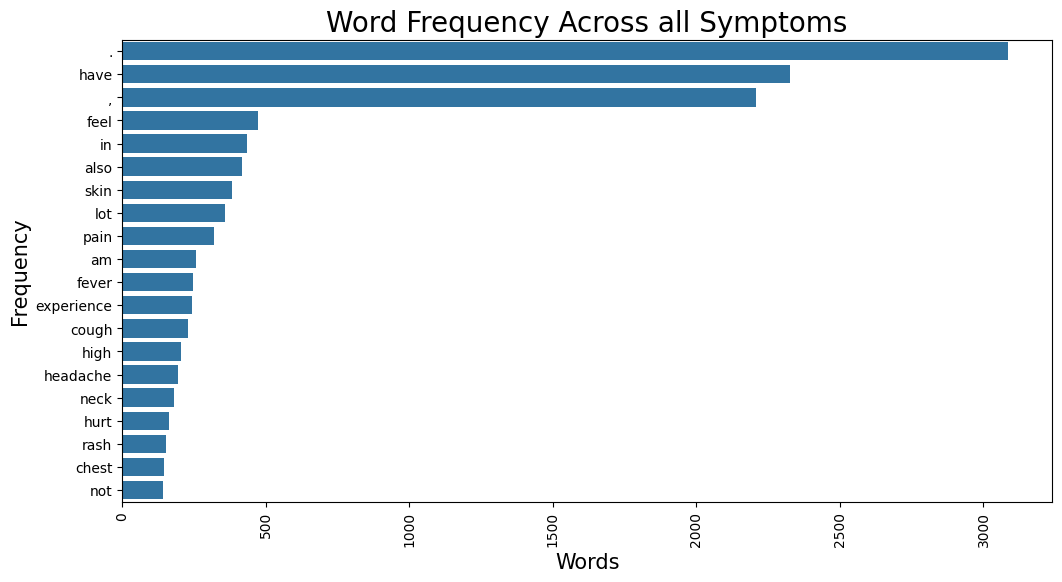

In [ ]:
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from collections import Counter

tokinized_text = []
for i in df['Symptoms']:
  tokinized_text.append(word_tokenize(i.lower()))

flattened_list = [word for sublist in tokinized_text for word in sublist]

word_count = Counter(flattened_list)

most_common_words = word_count.most_common(20)

words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(y=list(words), x=list(counts))

plt.xticks(rotation=90)
plt.title("Word Frequency Across all Symptoms", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

plt.show()

After entering the Feature engineering phase we will remove punctuation , and . as they don't have any value now instead they will be adding more noise and the chart prove it.

In [ ]:
df['Symptoms'] = df['Symptoms'].apply(lambda x: x.replace('.', '').replace(',', ''))
df.head()

,Disease,Symptoms
0,Psoriasis,have experience skin rash arm leg torso past week red itchy cover in dry scaly patch
1,Psoriasis,skin have peel especially knee elbow scalp peel accompanied burn sting sensation
2,Psoriasis,have experience joint pain in finger wrist knee pain achy throbbing get bad joint
3,Psoriasis,silver like dust skin especially low scalp dust small scale flake easily scratch
4,Psoriasis,nail have small dent pit in feel inflammatory tender touch minor rashe arm


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


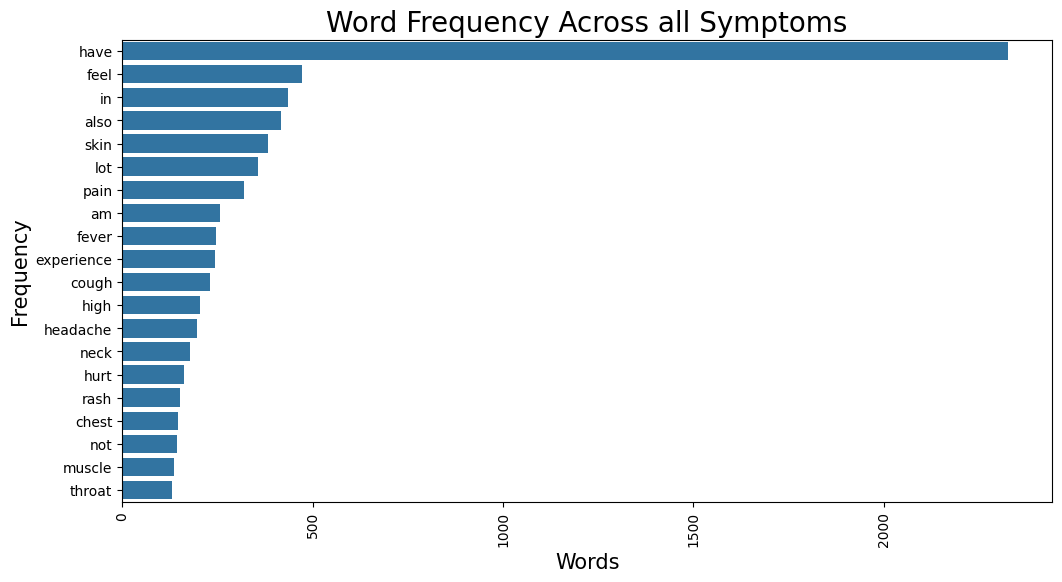

In [ ]:
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from collections import Counter

tokinized_text = []
for i in df['Symptoms']:
  tokinized_text.append(word_tokenize(i.lower()))

flattened_list = [word for sublist in tokinized_text for word in sublist]

word_count = Counter(flattened_list)

most_common_words = word_count.most_common(20)

words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(y=list(words), x=list(counts))

plt.xticks(rotation=90)
plt.title("Word Frequency Across all Symptoms", fontsize = 20)
plt.xlabel("Words", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

plt.show()

#### 4.2.1
starting with TF-IDF.

From 4.1 section i undesrtood that IF-IDF will be a good apprach so it can handle words like have, be, in and others...


Apply TF-IDF to the Symptoms column and transform it into a numerical matrix.
Use ngram_range to capture single words and word pairs (e.g., (1, 2)).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000)
x_tfidf = tfidf_vectorizer.fit_transform(df['Symptoms'])

svd = TruncatedSVD(n_components=300)  # Reduce to 300 dimensions
reduced_x_tfidf = svd.fit_transform(x_tfidf)

In [ ]:
print(f"Reduced TF-IDF shape: {reduced_x_tfidf.shape}")
print(f"Sparsity: {100 * (1 - x_tfidf.nnz / (x_tfidf.shape[0] * x_tfidf.shape[1])):.2f}%")
print(tfidf_vectorizer.get_feature_names_out()[:10])


Reduced TF-IDF shape: (1200, 300)
Sparsity: 99.15%
['abdomen' 'abdomen day' 'abdomen have' 'abdomen hour' 'abdominal'
 'abdominal ache' 'abdominal cramp' 'abdominal pain' 'ability'
 'ability concentrate']


After i saw that the word abdoman which is a misspelled word i wanted to check the original data

In [ ]:
display(df['Symptoms'].str.contains('abdoman', case=False).any())

display(df[df['Symptoms'].str.contains('abdoman', case=False)])


np.False_

,Disease,Symptoms


After i know for sure that it exist i will use textblob libary to fix misspelling automaticlly

In [ ]:
from textblob import TextBlob

df['Symptoms'] = df['Symptoms'].apply(lambda x: str(TextBlob(x).correct()))



In [ ]:
display(df['Symptoms'].str.contains('abdoman', case=False).any())

display(df[df['Symptoms'].str.contains('abdoman', case=False)])

np.False_

,Disease,Symptoms


Reapply TD-IDF and add min_df=2 to Remove very rare terms


* try diffreant max_features value to check model preformance in the futrue

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000, min_df=2)
x_tfidf = tfidf_vectorizer.fit_transform(df['Symptoms'])

# svd = TruncatedSVD(n_components=500)  # Reduce to 500 dimensions
svd = TruncatedSVD(n_components=300)  # Reduce to 300 dimensions
reduced_x_tfidf = svd.fit_transform(x_tfidf)

In [ ]:
print(f"Reduced TF-IDF shape: {reduced_x_tfidf.shape}")
print(f"Sparsity: {100 * (1 - x_tfidf.nnz / (x_tfidf.shape[0] * x_tfidf.shape[1])):.2f}%")
print(tfidf_vectorizer.get_feature_names_out()[:10])


Reduced TF-IDF shape: (1200, 300)
Sparsity: 99.15%
['abdomen' 'abdomen have' 'abdomen hour' 'abdominal' 'abdominal ache'
 'abdominal cramp' 'abdominal pain' 'ability' 'ability concentrate'
 'ability taste']


#### 4.2.2 FastText Embedding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy

dataset = pd.read_csv("/content/NER_Preprocessed_Data.csv")

df = pd.DataFrame(dataset)
df['tokenized_symptoms'] = df['Symptoms'].apply(lambda x: x.split())
df.head()

In [ ]:
#  pip install --upgrade numpy gensim


PreTrained FastText

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
!gunzip cc.en.300.vec.gz


In [ ]:
from gensim.models import KeyedVectors

fasttext_pretrained = KeyedVectors.load_word2vec_format('cc.en.300.vec', binary=False)

fasttext_pretrained.save("cc_en_300_kv.kv")

In [ ]:


# model = FastText(sentences=df['tokenized_symptoms'].tolist(), vector_size=100, window=5, min_count=3, workers=4, epochs=10, sg=1, seed=42)
# model.save("fasttext_model.bin")


In [ ]:
# def get_sentence_embedding(sentence, model):
#     words = sentence.lower().split()
#     word_vectors = [model.wv[word] for word in words if word in model.wv]
#     if word_vectors:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(model.vector_size)

# # Then create embeddings like this:
# X_fasttext = np.array([get_sentence_embedding(text, model) for text in df['Symptoms']])
# np.save('FastText_Embeddings.npy', X_fasttext)


In [ ]:
def get_sentence_embedding(sentence):
    words = sentence.lower().split()
    word_vectors = [fasttext_pretrained[word] for word in words if word in fasttext_pretrained]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(fasttext_pretrained.vector_size)

# Apply to original symptoms
X_fasttext_symptoms = np.array([get_sentence_embedding(text) for text in df['Symptoms']])
np.save('FastText_Embeddings_Symptoms.npy', X_fasttext_symptoms)

# Apply the same function to the NER column
X_fasttext_ner = np.array([get_sentence_embedding(text) for text in df['NER']])
np.save('FastText_Embeddings_NER.npy', X_fasttext_ner)

#### 4.3
Encode the Disease column

In [ ]:
Encoded_Disease = pd.get_dummies(df['Disease'], prefix='')

Encoded_Disease.head()
disease_names = Encoded_Disease.columns.tolist()
disease_names

['_Acne',
 '_Arthritis',
 '_Bronchial Asthma',
 '_Cervical spondylosis',
 '_Chicken pox',
 '_Common Cold',
 '_Dengue',
 '_Dimorphic Hemorrhoids',
 '_Fungal infection',
 '_Hypertension',
 '_Impetigo',
 '_Jaundice',
 '_Malaria',
 '_Migraine',
 '_Pneumonia',
 '_Psoriasis',
 '_Typhoid',
 '_Varicose Veins',
 '_allergy',
 '_diabetes',
 '_drug reaction',
 '_gastroesophageal reflux disease',
 '_peptic ulcer disease',
 '_urinary tract infection']

In [ ]:
# Remove the leading underscore from each name
disease_names = [name.lstrip('_') for name in disease_names]
disease_names

['Acne',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Common Cold',
 'Dengue',
 'Dimorphic Hemorrhoids',
 'Fungal infection',
 'Hypertension',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Pneumonia',
 'Psoriasis',
 'Typhoid',
 'Varicose Veins',
 'allergy',
 'diabetes',
 'drug reaction',
 'gastroesophageal reflux disease',
 'peptic ulcer disease',
 'urinary tract infection']

In [ ]:
Encoded_Disease = Encoded_Disease.astype(int)
Encoded_Disease.head()

,_Acne,_Arthritis,_Bronchial Asthma,_Cervical spondylosis,_Chicken pox,_Common Cold,_Dengue,_Dimorphic Hemorrhoids,_Fungal infection,_Hypertension,...,_Pneumonia,_Psoriasis,_Typhoid,_Varicose Veins,_allergy,_diabetes,_drug reaction,_gastroesophageal reflux disease,_peptic ulcer disease,_urinary tract infection
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### 4.5
Save the transformed data and feature names for modeling.


In [ ]:
# Save the log as a text file
log_content = """
### Feature Engineering Log

1. **TF-IDF Vectorization**:
   - Applied TF-IDF to the 'Symptoms' column for feature extraction.
   - N-gram range set to (1, 2), capturing both unigrams and bigrams.
   - Limited features to 3,000 most important terms using `max_features`.
   - Filtered rare terms using `min_df=2`, ensuring terms appear in at least 2 documents.

2. **Analysis of Top Features**:
   - Inspected the top 10 features after vectorization, including:
     - "abdomen day"
     - "abdomen hour"
     - "abdominal pain"
     - "ability concentrate"
   - Observed that some terms (e.g., "abdomen") were prominent but validated their relevance in the dataset.

3. **Dimensionality Reduction**:
   - Applied Truncated SVD to reduce dimensionality of the TF-IDF matrix.
   - Reduced the feature space to 300 dimensions for efficiency and better model performance.
   - Ensured that the reduced matrix retained key information.

4. **Encoded the disease column**:
"""

log_file_path = "Feature_Engineering_Log.txt"

with open(log_file_path, "w") as log_file:
    log_file.write(log_content)




In [ ]:
from scipy.sparse import save_npz

df.to_csv("FinalPreprocessdData.csv", index=False)

save_npz('TFIDF_Matrix.npz', x_tfidf)
np.save('Reduced_TFIDF.npy', reduced_x_tfidf)
np.save('Dummy_Encoded_Disease.npy', Encoded_Disease.values)
np.save('Encoded_Disease_Columns.npy', Encoded_Disease.columns.to_list())


### **5- Splitting the DataSet**



#### 5.1
Training Dataset to train the model.
Testing DataSet to test the model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

x_tfidf = np.load('/content/Reduced_TFIDF.npy')
#x_fasttext = np.load('/content/FastText_Embeddings_NER.npy')

y = np.load('/content/Dummy_Encoded_Disease.npy')

print(f"Features TF-IDF Shape (X): {x_tfidf.shape}")  # Expected: (number of samples = 1200 , featurre = 300)
#print(f"Features FatText Shape (X): {x_fasttext.shape}") # Expected: (number of samples = 1200 , featurre = 100)
print(f"Labels Shape (y): {y.shape}")    # Expected: (number of samples=1200, number of classes=24)

# Check consistency
assert x_tfidf.shape[0] == y.shape[0], "Mismatch: Number of samples in X and y do not match!"
#assert x_fasttext.shape[0] == y.shape[0], "Mismatch: Number of samples in X_fasttext and y do not match!"

Features TF-IDF Shape (X): (1200, 300)
Labels Shape (y): (1200, 24)


In [ ]:
disease_distribution = y.sum(axis=0)

print("Number of samples per disease:", disease_distribution)
print("Total samples:", disease_distribution.sum())


Number of samples per disease: [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50]
Total samples: 1200


In [ ]:
# Check if each row has exactly one '1'
row_sums = y.sum(axis=1)
assert np.all(row_sums == 1), "Error: Some rows in y do not have exactly one '1'!"
print("One-hot encoding verified: Each row has exactly one '1'.")


One-hot encoding verified: Each row has exactly one '1'.


#### 5.2.1 TF-IFD Splitting
General split 90% training+validation and 10% test

In [ ]:
from sklearn.model_selection import train_test_split

x_train_val, x_test , y_train_val , y_test = train_test_split(x_tfidf, y, test_size=0.1, random_state=42, stratify=y)

print(f"Train+Validation Set Shape: {x_train_val.shape}")
print(f"Test Set Shape: {x_test.shape}")
print(f"Train+Validation Set Shape: {y_train_val.shape}")
print(f"Test Set Shape: {y_test.shape}")

Train+Validation Set Shape: (1080, 300)
Test Set Shape: (120, 300)
Train+Validation Set Shape: (1080, 24)
Test Set Shape: (120, 24)


Split training_val into 80% training and 20% val

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1111, random_state=42, stratify=y_train_val)

print(f"Train Set Shape: {x_train.shape}")
print(f"Validation Set Shape: {x_val.shape}")
print(f"Train Set Shape: {y_train.shape}")
print(f"Validation Set Shape: {y_val.shape}")

Train Set Shape: (960, 300)
Validation Set Shape: (120, 300)
Train Set Shape: (960, 24)
Validation Set Shape: (120, 24)


Verification

In [ ]:
print("Train Class Distribution:", y_train.sum(axis=0))
print("Validation Class Distribution:", y_val.sum(axis=0))
print("Test Class Distribution:", y_test.sum(axis=0))

Train Class Distribution: [40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40]
Validation Class Distribution: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Test Class Distribution: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


Create folder for TFIDF Split data and Save all files for direct future use one diffreant models

In [ ]:
np.save('TFIDF_x_train.npy', x_train)
np.save('TFIDF_y_train.npy', y_train)
np.save('TFIDF_x_val.npy', x_val)
np.save('TFIDF_y_val.npy', y_val)
np.save('TFIDF_x_test.npy', x_test)
np.save('TFIDF_y_test.npy', y_test)


Log

In [ ]:
log_content = """

1. Data was split into training, validation, and test sets using an 80-10-10 split.
2. Stratified splitting ensured balanced class distributions across splits.
3. Final Shapes:
   - Train: (960, 300) features, (960, 24) labels
   - Validation: (120, 300) features, (120, 24) labels
   - Test: (120, 300) features, (120, 24) labels
4. Splits were saved in the folder: 'TFIDF_Split_Data'

"""

log_file_path = "Split_Data.txt"

with open(log_file_path, "w") as log_file:
    log_file.write(log_content)

#### 5.2.2 FastText Splitting

In [ ]:
X = x_fasttext

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

print(f"Train+Validation Set Shape: {X_train_val.shape}")
print(f"Test Set Shape: {X_test.shape}")
print(f"Train+Validation Labels Shape: {y_train_val.shape}")
print(f"Test Labels Shape: {y_test.shape}")

# Further split train-validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42, stratify=y_train_val)

print(f"Train Set Shape: {X_train.shape}")
print(f"Validation Set Shape: {X_val.shape}")
print(f"Train Labels Shape: {y_train.shape}")
print(f"Validation Labels Shape: {y_val.shape}")

In [ ]:
np.save('FastText_x_train.npy', X_train)
np.save('FastText_x_val.npy', X_val)
np.save('FastText_x_test.npy', X_test)

np.save('FastText_y_train.npy', y_train)
np.save('FastText_y_val.npy', y_val)
np.save('FastText_y_test.npy', y_test)


### 6- Model Selection And Training

#### 6.1.1 loading TFIDF data


In [ ]:
import numpy as np

# Load the saved splits
X_train = np.load('/content/TFIDF_x_train.npy')
y_train = np.load('/content/TFIDF_y_train.npy')
X_val = np.load('/content/TFIDF_x_val.npy')
y_val = np.load('/content/TFIDF_y_val.npy')
X_test = np.load('/content/TFIDF_x_test.npy')
y_test = np.load('/content/TFIDF_y_test.npy')

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")




Train set: (960, 300), (960, 24)
Validation set: (120, 300), (120, 24)
Test set: (120, 300), (120, 24)


#### 6.1.2 FastText Loading

In [ ]:
import numpy as np

X_Ftrain = np.load("/content/FastText_x_train.npy")
X_Fval = np.load("/content/FastText_x_val.npy")
X_Ftest = np.load("/content/FastText_x_test.npy")

# Load saved labels
y_Ftrain = np.load("/content/FastText_y_train.npy")
y_Fval = np.load("/content/FastText_y_val.npy")
y_Ftest = np.load("/content/FastText_y_test.npy")

print(f"Train set: {X_Ftrain.shape}, {y_Ftrain.shape}")
print(f"Validation set: {X_Fval.shape}, {y_Fval.shape}")
print(f"Test set: {X_Ftest.shape}, {y_Ftest.shape}")

####6.2
Identify which model works better with text data ?
After some Research i decided to go with as start
  - Logistic Regression.



##### 6.2.1 First With TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
import joblib


y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet', C=2, l1_ratio=0.5)

model.fit(X_train, y_train_labels)
joblib.dump(model, 'TF-IDF_model.pkl')



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


['TF-IDF_model.pkl']


 Apply Evaluation metrics to evaluate the model preformance on validation set.


In [ ]:
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score, f1_score

val_predict = model.predict(X_val)

accuracy = accuracy_score(y_val_labels, val_predict)
precision = precision_score(y_val_labels, val_predict, average='weighted')
recall = recall_score(y_val_labels, val_predict, average='weighted')
cl = classification_report(y_val_labels, val_predict)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Validation Classification Report:\n" , classification_report(y_val_labels, val_predict, target_names=disease_names))

Accuracy: 0.9667
Precision: 0.9708
Recall: 0.9667
Validation Classification Report:
                                  precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         5
                      Arthritis       1.00      1.00      1.00         5
               Bronchial Asthma       1.00      0.80      0.89         5
           Cervical spondylosis       0.83      1.00      0.91         5
                    Chicken pox       1.00      1.00      1.00         5
                    Common Cold       0.83      1.00      0.91         5
                         Dengue       1.00      1.00      1.00         5
          Dimorphic Hemorrhoids       1.00      1.00      1.00         5
               Fungal infection       1.00      1.00      1.00         5
                   Hypertension       1.00      1.00      1.00         5
                       Impetigo       1.00      1.00      1.00         5
                       Jaundice       

 Testing

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score, f1_score

test_predict = model.predict(X_test)

accuracy = accuracy_score(y_test_labels, test_predict)
precision = precision_score(y_test_labels, test_predict, average='weighted')
recall = recall_score(y_test_labels, test_predict, average='weighted')
cl = classification_report(y_test_labels, test_predict)
f1 = f1_score(y_test_labels, test_predict, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Test Classification Report:\n", classification_report(y_test_labels, test_predict, target_names=disease_names))
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9500
Precision: 0.9575
Recall: 0.9500
Test Classification Report:
                                  precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         5
                      Arthritis       1.00      1.00      1.00         5
               Bronchial Asthma       0.71      1.00      0.83         5
           Cervical spondylosis       1.00      1.00      1.00         5
                    Chicken pox       1.00      1.00      1.00         5
                    Common Cold       0.80      0.80      0.80         5
                         Dengue       1.00      0.80      0.89         5
          Dimorphic Hemorrhoids       1.00      1.00      1.00         5
               Fungal infection       1.00      1.00      1.00         5
                   Hypertension       1.00      1.00      1.00         5
                       Impetigo       1.00      1.00      1.00         5
                       Jaundice       1.00  

Saving and Loading the Model Pipeline

In [ ]:
joblib.dump(model, 'TF-IDF_model.pkl')
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(svd, "svd_transformer.pkl")


['svd_transformer.pkl']

##### 6.2.2 Second With FastText

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_train_labels = np.argmax(y_Ftrain, axis=1)
y_val_labels = np.argmax(y_Fval, axis=1)
y_test_labels = np.argmax(y_Ftest, axis=1)

Fmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=5)
Fmodel.fit(X_Ftrain, y_train_labels)


# Evaluate on Validation Set
y_val_pred = Fmodel.predict(X_Fval)
print("Validation Accuracy:", accuracy_score(y_val_labels, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val_labels, y_val_pred))

# Evaluate on Test Set
y_test_pred = Fmodel.predict(X_Ftest)
print("Test Accuracy:", accuracy_score(y_test_labels, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test_labels, y_test_pred))

#### Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_train_labels = np.argmax(y_Ftrain, axis=1)
y_val_labels = np.argmax(y_Fval, axis=1)
y_test_labels = np.argmax(y_Ftest, axis=1)

# Initialize Random Forest model (you can tune parameters as needed)
Rmodel = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)
Rmodel.fit(X_Ftrain, y_train_labels)

# Evaluate on Validation Set
y_val_pred = Rmodel.predict(X_Fval)
print("Validation Accuracy:", accuracy_score(y_val_labels, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val_labels, y_val_pred))

# Evaluate on Test Set
y_test_pred = Rmodel.predict(X_Ftest)
print("Test Accuracy:", accuracy_score(y_test_labels, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test_labels, y_test_pred))


In [ ]:

joblib.dump(Rmodel, "/content/RandomForest_model.pkl")

In [ ]:
joblib.dump(Fmodel, 'FastText_model.pkl')


#### Confusion Matrix

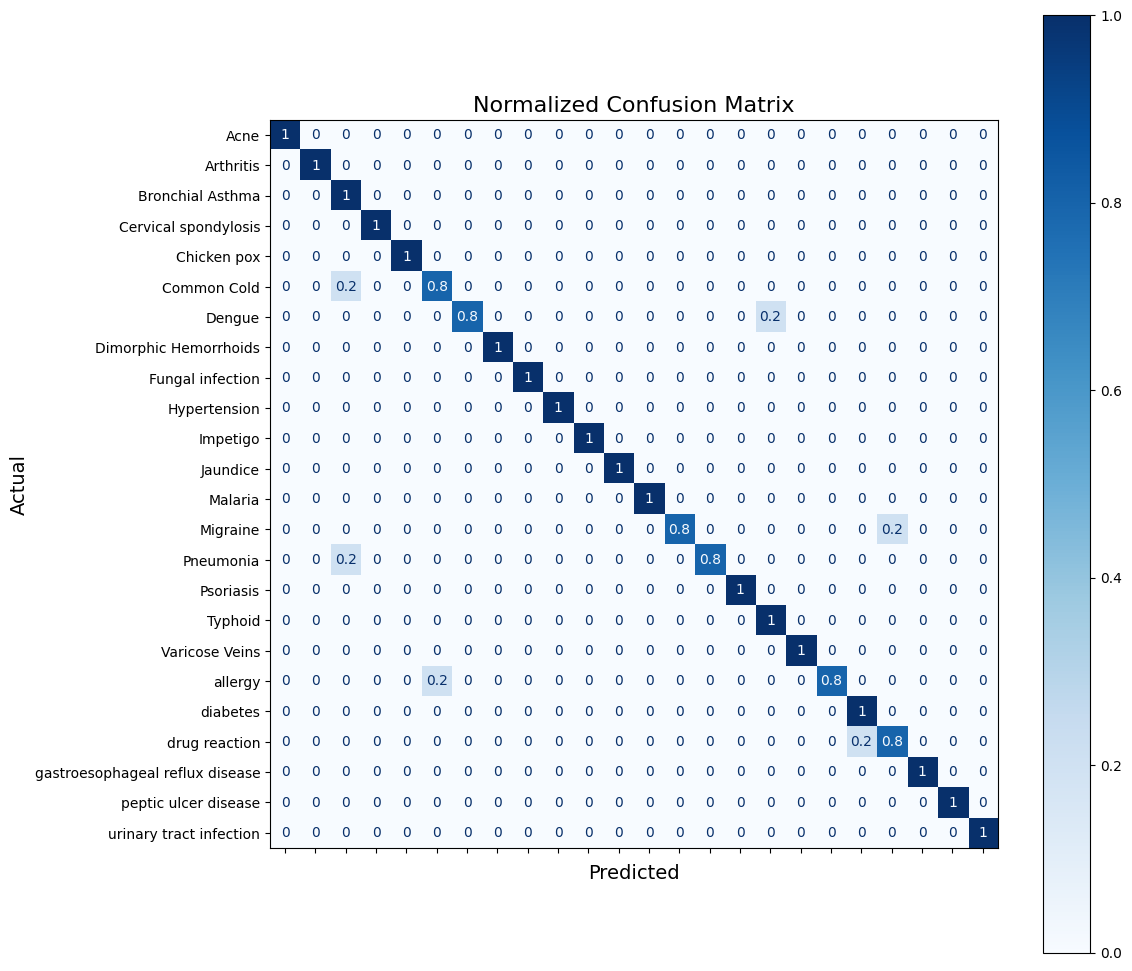

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test and test_predict are label-encoded, not one-hot
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)
if len(test_predict.shape) > 1 and test_predict.shape[1] > 1:
    test_predict = np.argmax(test_predict, axis=1)

# Clean disease names (optional, if still have underscores)
disease_names = [name.lstrip('_') for name in disease_names]

# Compute normalized confusion matrix
cm = confusion_matrix(y_test, test_predict, normalize='true')

# Create display
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=disease_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)

# Hide x-axis tick labels (bottom)
ax.set_xticklabels([])

# Improve visuals
plt.title("Normalized Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.tight_layout()
plt.show()


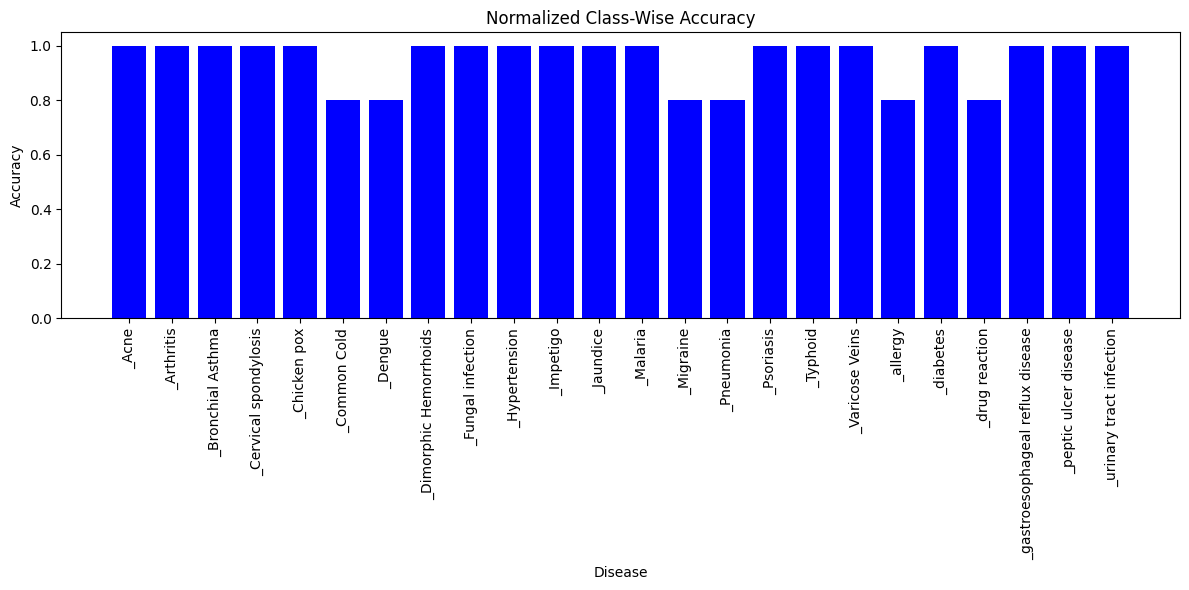

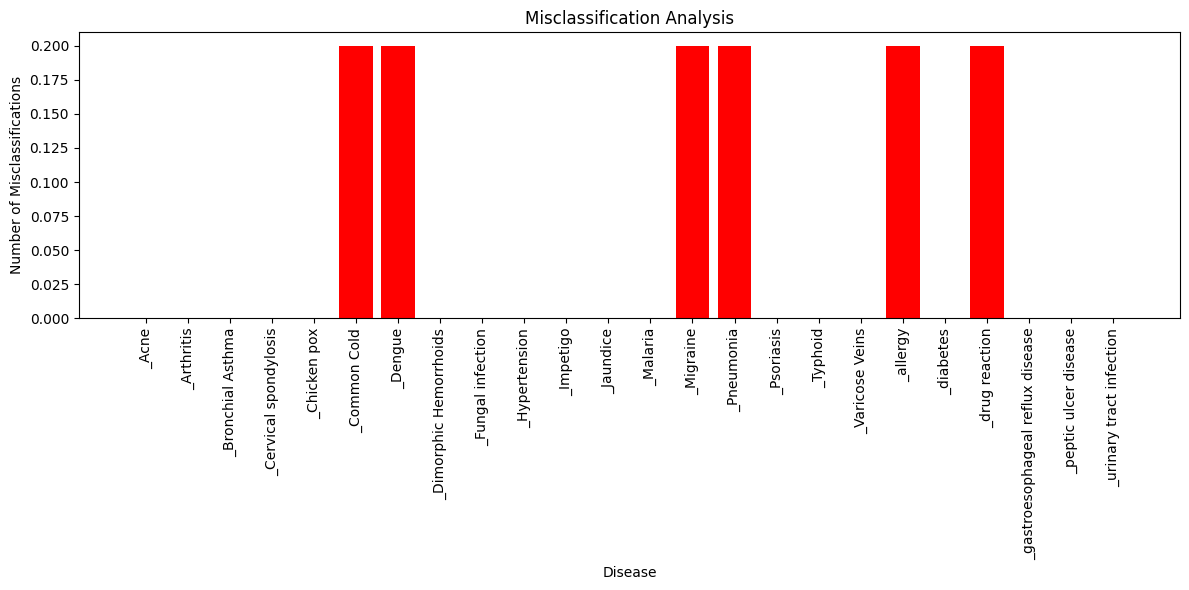

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


disease_names = Encoded_Disease.columns.tolist()

cm = confusion_matrix(y_test, test_predict, normalize='true')

# Class-wise accuracy chart
class_accuracies = cm.diagonal()
plt.figure(figsize=(12, 6))
plt.bar(disease_names, class_accuracies, color='blue')
plt.title("Normalized Class-Wise Accuracy")
plt.xlabel("Disease")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Misclassification analysis chart
misclassification_matrix = cm.copy()
np.fill_diagonal(misclassification_matrix, 0)
misclass_count = misclassification_matrix.sum(axis=1)
plt.figure(figsize=(12, 6))
plt.bar(disease_names, misclass_count, color='red')
plt.title("Misclassification Analysis")
plt.xlabel("Disease")
plt.ylabel("Number of Misclassifications")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Testing Real World Scenarios with TF-IDF

In [ ]:
import numpy as np
import joblib
import spacy
import re
import string
from sklearn.linear_model import LogisticRegression

# Load trained components
model = joblib.load("/content/TF-IDF_model.pkl")
tfidf_vectorizer = joblib.load("/content/tfidf_vectorizer.pkl")
svd = joblib.load("/content/svd_transformer.pkl")
disease_names_list = np.load('Encoded_Disease_Columns.npy', allow_pickle=True)

# Load SpaCy and customize stopwords
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words -= {'have', 'also', 'has', 'in'}
for word in ['have', 'also', 'has', 'in']:
    nlp.vocab[word].is_stop = False

# Contraction handling
contractions_custom = {"ve": "have", "m": "am"}

# Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    text = " ".join([token.text for token in nlp(text) if not token.is_stop])
    text = " ".join([token.lemma_ for token in nlp(text)])
    text = ' '.join([contractions_custom.get(word, word) for word in text.split()])
    return text

# Feature engineering
def feature_engineering(new_text, tfidf_vectorizer, svd):
    preprocessed_text = preprocess_text(new_text)
    input_tfidf = tfidf_vectorizer.transform([preprocessed_text])
    reduced_input = svd.transform(input_tfidf)
    return reduced_input

# Real-world test cases
real_world_cases = [
    ("I keep getting these painful, red bumps mostly on my cheeks and chin, and sometimes they feel swollen or come to a white head. They tend to flare up right before my period or when I’m stressed, and they’ve left some dark marks that won’t fade.", "Acne"),
    ("My fingers feel stiff and achy, especially in the morning—it takes a while before I can fully move them. Some days the joints even look a bit swollen and it’s hard to grip things like a jar or even a pen.", "Arthritis"),
    ("Sometimes it feels like I can’t get a full breath, especially when I’m around dust or cold air—it’s like there’s a tight band around my chest. I get this wheezing sound when I breathe out and have to use my inhaler a few times a week now.", "Bronchial Asthma"),
    ("I’ve been getting this dull, aching pain in my neck that spreads to my shoulders, especially after sitting at my desk too long. Sometimes my fingers feel tingly or weak, like they’re not getting good circulation.", "Cervical spondylosis"),
    ("It started with a fever and feeling really tired, then these itchy red bumps popped up—first on my chest, then all over. They quickly turned into blisters and it’s hard not to scratch them, even though I know I shouldn’t.", "Chicken pox"),
    ("I’ve had a stuffy nose, sneezing, and this scratchy throat for the past few days—nothing too serious, but it’s making me feel drained. The congestion is the worst at night and I’ve got this dry cough that won’t quit.", "Common Cold")
]

# Evaluation function
def test_real_world_inputs(model, tfidf_vectorizer, svd, disease_names, examples):
    correct = 0
    print("\n==== Real-World Evaluation ====\n")

    for i, (text, expected) in enumerate(examples, 1):
        features = feature_engineering(text, tfidf_vectorizer, svd)
        probs = model.predict_proba(features)[0]
        top3 = np.argsort(probs)[-3:][::-1]
        top3_diseases = [disease_names[i].replace("_", "") for i in top3]
        predicted_disease = top3_diseases[0]

        is_correct = predicted_disease.lower() == expected.lower()
        status = "✅" if is_correct else "❌"

        print(f"Case {i}:")
        print(f"   ➤ Input: {text}")
        print(f"   ➤ Top-3 Predictions: {top3_diseases}")
        print(f"   ➤ Expected: {expected} {status}\n")

        if is_correct:
            correct += 1

    total = len(examples)
    accuracy = correct / total
    print(f"🎯 Final Accuracy: {correct} / {total} = {accuracy:.2%}")

# Run evaluation
test_real_world_inputs(
    model=model,
    tfidf_vectorizer=tfidf_vectorizer,
    svd=svd,
    disease_names=disease_names_list,
    examples=real_world_cases
)



==== Real-World Evaluation ====

Case 1:
   ➤ Input: I keep getting these painful, red bumps mostly on my cheeks and chin, and sometimes they feel swollen or come to a white head. They tend to flare up right before my period or when I’m stressed, and they’ve left some dark marks that won’t fade.
   ➤ Top-3 Predictions: ['Common Cold', 'Impetigo', 'Fungal infection']
   ➤ Expected: Acne ❌

Case 2:
   ➤ Input: My fingers feel stiff and achy, especially in the morning—it takes a while before I can fully move them. Some days the joints even look a bit swollen and it’s hard to grip things like a jar or even a pen.
   ➤ Top-3 Predictions: ['Psoriasis', 'diabetes', 'Arthritis']
   ➤ Expected: Arthritis ❌

Case 3:
   ➤ Input: Sometimes it feels like I can’t get a full breath, especially when I’m around dust or cold air—it’s like there’s a tight band around my chest. I get this wheezing sound when I breathe out and have to use my inhaler a few times a week now.
   ➤ Top-3 Predictions: ['Typhoi

### Testing Real-world Scenarios with FastText

In [ ]:
import numpy as np
import joblib
import spacy
import re
import string
from gensim.models import FastText
from gensim.models import KeyedVectors

fasttext_model = KeyedVectors.load("/content/cc_en_300_kv.kv")
#fasttext_model = FastText.load("/content/fasttext_model.bin")
# logreg_model = joblib.load("/content/FastText_model.pkl")
rf_model = joblib.load("/content/RandomForest_model.pkl")
disease_names_list = np.load('Encoded_Disease_Columns.npy', allow_pickle=True)

# Load SpaCy and customize stopwords
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words -= {'have', 'also', 'has', 'in'}
for word in ['have', 'also', 'has', 'in']:
    nlp.vocab[word].is_stop = False

# Contraction handling
contractions_custom = {"ve": "have", "m": "am"}

# Preprocessing
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    # Tokenize and remove stopwords
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    # Lemmatize tokens
    lemmas = [token.lemma_ for token in nlp(" ".join(tokens))]
    # Replace contractions with expansions if any
    expanded = [contractions_custom.get(word, word) for word in lemmas]
    return " ".join(expanded)


#Sentence embedding
# def get_sentence_embedding(text):
#     words = preprocess_text(text).split()
#     word_vectors = [fasttext_model[word] for word in words if word in fasttext_model]
#     return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(fasttext_model.vector_size)
def get_sentence_embedding(text):
    words = preprocess_text(text).split()
    # Use fasttext_model to access word vectors
    word_vectors = [fasttext_model[word] for word in words if word in fasttext_model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(fasttext_model.vector_size)

# Real-world test cases
real_world_cases = [
    ("I keep getting these painful, red bumps mostly on my cheeks and chin, and sometimes they feel swollen or come to a white head. They tend to flare up right before my period or when I’m stressed, and they’ve left some dark marks that won’t fade.", "Acne"),
    ("My fingers feel stiff and achy, especially in the morning—it takes a while before I can fully move them. Some days the joints even look a bit swollen and it’s hard to grip things like a jar or even a pen.", "Arthritis"),
    ("Sometimes it feels like I can’t get a full breath, especially when I’m around dust or cold air—it’s like there’s a tight band around my chest. I get this wheezing sound when I breathe out and have to use my inhaler a few times a week now.", "Bronchial Asthma"),
    ("I’ve been getting this dull, aching pain in my neck that spreads to my shoulders, especially after sitting at my desk too long. Sometimes my fingers feel tingly or weak, like they’re not getting good circulation.", "Cervical spondylosis"),
    ("It started with a fever and feeling really tired, then these itchy red bumps popped up—first on my chest, then all over. They quickly turned into blisters and it’s hard not to scratch them, even though I know I shouldn’t.", "Chicken pox"),
    ("I’ve had a stuffy nose, sneezing, and this scratchy throat for the past few days—nothing too serious, but it’s making me feel drained. The congestion is the worst at night and I’ve got this dry cough that won’t quit.", "Common Cold")
]

# Evaluation function
def test_real_world_inputs(model, embedding_fn, disease_names, examples):
    correct = 0
    print("\n==== Real-World Evaluation ====\n")

    for i, (text, expected) in enumerate(examples, 1):
        emb = embedding_fn(text).reshape(1, -1)
        probs = model.predict_proba(emb)[0]
        top3 = np.argsort(probs)[-3:][::-1]
        top3_diseases = [disease_names[i].replace("_", "") for i in top3]
        predicted_disease = top3_diseases[0]

        is_correct = predicted_disease.lower() == expected.lower().replace("_", "")
        status = "✅" if is_correct else "❌"

        print(f"   ➤ Top-3 Predictions: {top3_diseases}")
        print(f"   ➤ Expected: {expected.replace('_', '')} {'✅' if predicted_disease.lower() == expected.lower().replace('_', '') else '❌'}\n")

        if is_correct:
            correct += 1

    total = len(examples)
    accuracy = correct / total
    print(f"🎯 Final Accuracy: {correct} / {total} = {accuracy:.2%}")

# Run evaluation
test_real_world_inputs(
    model=rf_model,
    embedding_fn=get_sentence_embedding,
    disease_names=disease_names_list,
    examples=real_world_cases
)


In [ ]:
print("Loaded Disease Names:", disease_names)
print("Number of Diseases:", len(disease_names))

# ---------------------------------- Diff Approach --------------------------------

# Why Change the Approach?

In the first approach, we used a traditional ML pipeline with TF-IDF / FastText for feature extraction and Logistic Regression / Random Forest for classification.  

Although this performed reasonably on the training data, it struggled to generalize and often predicted incorrectly for new, unseen symptom descriptions.  

The main limitation was that classical feature engineering (TF-IDF or word embeddings) could not fully capture the complex, contextual meaning of medical symptoms, especially when expressed in varied ways.  

To overcome this, we adopted a new approach:  

- Apply **Named Entity Recognition (NER)** using biomedical NLP models to extract meaningful entities such as symptoms, conditions, and disorders.  
- Combine these entities with the original text to enrich input features for the model.  
- Fine-tune **Transformer-based models** (RoBERTa, BioBERT, ClinicalBERT, etc.) that can capture semantic and contextual relationships in the text more effectively.  
- Evaluate performance not only with standard metrics but also on **real-world, patient-like symptom descriptions** to ensure the model generalizes well.  

This approach allows the model to better understand medical symptom descriptions and make more reliable predictions on previously unseen cases.


## Advanced Approach
### 1- NER(Named Entity Recognition)

#### *1.1 - Basic Named Entity Recognition (NER):*

      • Apply SciSpaCy and transformer-based NER to extract symptoms, conditions, and disorders.
      • Use keyword-based fallback for entities missed by NER.
      • Create three input versions: original text, text + NER, NER-only.

#### *1.2 - Enhanced NER Model:*

    • Install Larger SciSpaCy Model
    • Transformer-based NER Pipeline
    • Apply NER and Prepare Dataset
    • Check Empty NER Rows
    • Sample Good NER Results
    • Top NER Entities

#### *2 - BERT pipeline:*
    • Load and Inspect Dataset
    • Basic Data Inspection
    • Rename Columns
    • Shuffle Dataset
    • Encode Labels
    • Train/Validation/Test Split
    • Tokenize Data
    • Create PyTorch Dataset
    • Initialize BERT/Transformer Model
    • Install/Upgrade Transformers
    • Set Training Arguments
    • Install Evaluate Library
    • Define Metrics and Compute Function
    • Initialize Trainer
    • Train the Model
    • Evaluate on Test Dataset
    • Unzip Pretrained Model Checkpoints
    • Move Pretrained Model Folders
    • Save Model and Tokenizer



### 1.1 Basic NER Extraction

Here, I’m using SciSpaCy to pull out disease-related entities from the symptom text.  
I also added a simple fallback using keywords, just in case the NER misses anything.  
At the end, I make three versions of the input: the original text, text combined with NER entities, and a version that’s NER-only or uses the fallback.



In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm

# Load SciSpaCy NER model
nlp = spacy.load("en_ner_bc5cdr_md")

# Load dataset
df = pd.read_csv('/content/cleaned_AugmentedSymptom2Disease_exp.csv', encoding='utf-8-sig')

# Extended NER extractor
def extract_diseases(text):
    doc = nlp(str(text))
    return " | ".join([ent.text for ent in doc.ents if ent.label_ in {"DISEASE", "CHEMICAL", "ENTITY"}])

# Fallback dictionary (you can expand this based on common symptom patterns)
disease_keywords = {
    "fever": "Malaria",
    "rash": "Impetigo",
    "joint pain": "Arthritis",
    "wheezing": "Bronchial Asthma",
    "yellow skin": "Jaundice",
    "vomiting": "Peptic ulcer disease",
    "itching": "Fungal infection",
    "thirsty": "Diabetes",
    "blood pressure": "Hypertension",
    "blisters": "Chicken pox",
}

def keyword_fallback(text):
    for keyword, disease in disease_keywords.items():
        if keyword in text.lower():
            return disease
    return ""

def smart_ner_fallback(row):
    ner_text = row['disease_entities'].strip()
    if ner_text:
        return ner_text
    fallback = keyword_fallback(row['text'])
    return fallback if fallback else row['text']

# Apply NER
tqdm.pandas()
df['disease_entities'] = df['text'].progress_apply(extract_diseases)

# Show stats
empty_ner_count = df['disease_entities'].apply(lambda x: len(x.strip()) == 0).sum()
print(f"🔍 Empty NER rows: {empty_ner_count} / {len(df)}")

# Prepare 3 versions of the input
df['input_original'] = df['text']
df['input_with_ner'] = df.apply(lambda row: row['text'] + " | " + row['disease_entities'] if row['disease_entities'].strip() else row['text'], axis=1)
df['input_ner_only'] = df.apply(smart_ner_fallback, axis=1)


#### 1.1.2 Save the Dataset

In [ ]:
df.to_csv('/content/ner_augmented_dataset.csv', index=False, encoding='utf-8-sig')

### 1.2 **Enhanced** NAMED entity Recognition

#### 1.2.1 Install Enhanced SciSpaCy

Now I’m installing the larger SciSpaCy biomedical model.  
This one can catch more medical entities than the basic model, which should make our NER better.

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_lg-0.5.1.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 115.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/532.3 MB 21.4 MB/s eta 0:00:23^C


#### 1.2.2 Transformer-based NER Pipeline

Here we set up a transformer-based NER model specialized for biomedical text.  
The cell also includes text cleaning, removal of generic or irrelevant words, normalization of phrases, and trimming of overly long entities.  
The function `extract_diseases_transformer` combines all of this to produce clean, high-quality entity extractions from symptom descriptions.



In [1]:
import pandas as pd
import re
from tqdm import tqdm
from transformers import pipeline
from nltk.corpus import stopwords
import nltk

# Setup
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load NER model (optimized for biomedical data)
ner_model = pipeline(
    "ner",
    model="d4data/biomedical-ner-all",
    aggregation_strategy="simple",
    device=0  # Set to -1 for CPU or 0 for GPU
)

# Basic text cleaning
def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9\s.,]", "", str(text))
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()

# Generic low-value or redundant terms to remove
GENERIC_WORDS = {
    "very", "strong", "excessive", "awful", "severe", "decrease",
    "difficulty", "problems", "issue", "symptom", "symptoms", "condition",
    "thing", "productive", "stuff", "to", "time", "body", "high", "brown",
    "behind", "eyes", "awake", "nasty", "made up of small scales", "flake off"
}

# Allow short useful medical terms
ALLOWED_SHORT_WORDS = {
    "rash", "pain", "back", "neck", "skin", "gas", "itch", "legs", "arms", "cold"
}

# Phrase normalization (helps downstream consistency)
PHRASE_MAP = {
    "lighthead": "lightheadedness",
    "to think properly": "confusion",
    "staying balanced": "balance issues",
    "chest hurts": "chest pain",
    "fatty": "fatty food intolerance",
    "spicy": "spicy food intolerance",
    "made up of small scales": "scaly skin",
    "flake off": "scaling"
}

# Trim overly long NER phrases
def trim_long_phrases(entity_list, max_words=5):
    return [e for e in entity_list if len(e.split()) <= max_words]

# Normalize known phrases
def map_phrases(entity_list):
    return [PHRASE_MAP.get(e, e) for e in entity_list]

# Final pipeline for extracting NER entities
def extract_diseases_transformer(text):
    text = clean_text(text)
    try:
        entities = ner_model(text)
        accepted_labels = {
            "Sign_symptom", "Condition", "Disease_disorder",
            "Severity", "Detailed_description",
            "Biological_structure", "Lab_value", "Texture", "Shape"
        }

        raw_entities = [ent['word'].strip().lower() for ent in entities if ent.get('entity_group') in accepted_labels]

        clean_entities = []
        for e in raw_entities:
            if (
                e.startswith("##")
                or (len(e) < 4 and e not in ALLOWED_SHORT_WORDS)
                or any(char.isdigit() for char in e)
                or e in stop_words
                or e in GENERIC_WORDS
            ):
                continue
            if e not in clean_entities:
                clean_entities.append(e)

        clean_entities = map_phrases(clean_entities)
        clean_entities = trim_long_phrases(clean_entities)

        return " | ".join(clean_entities)

    except Exception as e:
        print(f"⚠️ NER error: {e}")
        return ""


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/266M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


#### 1.2.3 Apply Transformer NER

This cell applies the transformer-based NER to the dataset.  
It also checks how many rows did not produce any entities and combines the extracted entities with the original text for a new input column.  
Finally, the relevant columns are saved to a CSV file for downstream modeling.



In [2]:
df = pd.read_csv('/content/cleaned_AugmentedSymptom2Disease_exp.csv', encoding='utf-8-sig')

# Apply NER
tqdm.pandas()
df['disease_entities'] = df['text'].progress_apply(extract_diseases_transformer)

# Show stats
empty_count = df['disease_entities'].fillna("").apply(lambda x: len(str(x).strip()) == 0).sum()
print(f"🔍 NER Failed on: {empty_count} / {len(df)} rows")


#Optional: Save the final version
# df["input_ner_only"] = df["disease_entities"]
df["input_with_ner"] = df["text"] + " " + df["disease_entities"]

# Keep only the desired columns in correct order
final_df = df[["label", "text", "input_with_ner"]]

# Save to CSV
final_df.to_csv("/content/enhanced_ner_augmented.csv", index=False, encoding="utf-8-sig")

print("✅ Dataset saved with 4 columns:", final_df.columns.tolist())


100%|██████████| 1440/1440 [03:31<00:00,  6.82it/s]

🔍 NER Failed on: 41 / 1440 rows
✅ Dataset saved with 4 columns: ['label', 'text', 'input_with_ner']


#### 1.2.4 Check Empty NER Rows

Here we calculate how many rows did not have any entities extracted.  
This gives an indication of how well the NER process is performing.

In [3]:
empty_ner_count = df['disease_entities'].fillna("").apply(lambda x: len(x.strip()) == 0).sum()
print(f"🧩 Empty NER rows: {empty_ner_count} / {len(df)} ({100 * empty_ner_count / len(df):.2f}%)")


🧩 Empty NER rows: 41 / 1440 (2.85%)


#### 1.2.5 Sample Good NER Results

We display a few random examples where NER successfully extracted entities.  
This allows for a quick qualitative check of the extraction quality.

In [4]:
print("\n✅ Sample good NER results:")
print(df[df['disease_entities'].str.strip() != ''][['text', 'disease_entities']].sample(10))



✅ Sample good NER results:
                                                   text  \
335   I've been feeling sick and feel a strong need ...   
0     I have been experiencing a skin rash on my arm...   
1125  Blood is in my pee, and I have a low body temp...   
1414  I have trouble focusing, and my emotions fluct...   
453   My eyes are red and watery all the time. I've ...   
293   I feel I have a skin condition. My face has ra...   
695   I've been struggling with a really nasty rash ...   
156   I am having a lot of trouble sleeping because ...   
541   I have sharp pain and bleeding when I go to th...   
520   I'm dripping with perspiration and can't seem ...   

                                       disease_entities  
335             feeling | sick | sharp | ache | swollen  
0              skin | rash | torso | itchy | dry, scaly  
1125  blood | continual | headache | uncontrolla | l...  
1414                              brain | murky | foggy  
453   watery | sinuses | feeling

#### 1.2.6 Top NER Entities

This counts all extracted entities across the dataset to identify the most frequent ones.  
It helps understand the main patterns the NER is capturing and ensures the output is meaningful.

In [5]:
from collections import Counter

all_entities = []
for ents in df['disease_entities']:
    all_entities.extend([e.strip() for e in ents.split("|") if e.strip()])

entity_counts = Counter(all_entities)
print("\n📊 Top 10 most common NER-extracted entities:")
print(entity_counts.most_common(10))



📊 Top 10 most common NER-extracted entities:
[('skin', 221), ('pain', 177), ('rash', 162), ('fever', 150), ('neck', 134), ('chest', 128), ('headache', 120), ('sore', 86), ('back', 76), ('throat', 76)]


### 2- BERT Pipeline

#### 2.1 – Load Dataset
This cell loads our enhanced NER-augmented dataset into a pandas DataFrame and displays a random sample of 10 rows. This helps us quickly understand the structure of the data, see the columns available, and check how the symptom texts and disease labels are represented.

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/enhanced_ner_augmented.csv', encoding='utf-8-sig')
df = pd.DataFrame(dataset)
df.sample(10)

#### 2.2 – Data Inspection
performs basic data inspection. It shows the count of each disease label to understand class distribution, checks for missing values, identifies duplicate rows, and outputs the shape of the DataFrame. This helps ensure our data is clean and ready for preprocessing and modeling.

In [ ]:
print(df['label'].value_counts())
print(df.isnull().sum())
print(df.duplicated().sum())
df.shape

#### 2.3 – Rename Columns & Preview Data

In [ ]:
df.rename(columns={'label': 'Disease'}, inplace=True)
# del df['Unnamed: 0']
df.head()

#### 2.4 – Shuffle the Dataset
This cell shuffles the dataset randomly to ensure that the order of rows does not introduce bias during training and splits. Resetting the index ensures the DataFrame has a clean, sequential index.

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


#### 2.5 – Encode Labels and Prepare Mappings
This cell converts disease labels into numerical format using LabelEncoder, which is required for model training. It also creates dictionaries (label2id and id2label) to map between label names and integers for easy reference during training and evaluation.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()
df["Disease_int"] = label_encoder.fit_transform(df["Disease"])

lablel2id =  {label: i for i, label in enumerate(label_encoder.classes_)}
id2label = {i: label for i, label in enumerate(label_encoder.classes_)}

print("number of clasess", len(label_encoder.classes_))
print("lablel2id", lablel2id)

#### 2.6 – Split Data into Train, Validation, and Test Sets

This cell splits the dataset into training, validation, and test sets. It uses stratification to ensure the class distribution is preserved across all sets. Different input versions (original text, text + NER, NER-only) can be chosen here.

In [ ]:
from sklearn.model_selection import train_test_split

# symptoms = df["text"].tolist()            # <- for original
symptoms = df["input_with_ner"].tolist()  # <- for text + ner
# symptoms = df["input_ner_only"].fillna("").astype(str).tolist() # <- for ner only
labels = df["Disease_int"].tolist()

X_train, X_all, y_train, y_all = train_test_split(symptoms, labels, test_size=0.2, stratify = labels, random_state=42)

X_val, X_test, val_labels, test_labels = train_test_split(X_all, y_all, test_size=0.5, stratify = y_all, random_state=42)

print("train size:", len(X_train))
print("val size:", len(X_val))
print("test size:", len(X_test))

#### 2.7 – Initialize Tokenizer and Encode Data

This cell loads the chosen transformer tokenizer (BERT, RoBERTa, or other biomedical models) and encodes the train, validation, and test datasets into token IDs, attention masks, and padding suitable for model input.

In [ ]:
from transformers import (
    BertTokenizer, BertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification,
    AutoTokenizer, AutoModelForSequenceClassification
)
import torch

#tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# tokenizer = BertTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.1")
# tokenizer = BertTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
# tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")
# tokenizer = AutoTokenizer.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext')



def tokenizer_data(text):
    return tokenizer(text, truncation=True, padding=True, max_length=128)

train_encoding = tokenizer(X_train, truncation=True, padding= True, max_length=128)
val_encoding = tokenizer(X_val, truncation=True, padding= True, max_length=128)
test_encoding = tokenizer(X_test, truncation=True, padding= True, max_length=128)

#### 2.8 – Create PyTorch Dataset

This cell wraps the tokenized inputs and labels into a PyTorch Dataset class so they can be efficiently fed into the transformer model during training and evaluation.

In [ ]:
import torch

class SymptomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = SymptomDataset(train_encoding, y_train)
val_dataset = SymptomDataset(val_encoding, val_labels)
test_dataset = SymptomDataset(test_encoding, test_labels)

2.9 – Initialize Model for Classification

we will loads the chosen transformer model (BERT, BioBERT, ClinicalBERT, or RoBERTa) for sequence classification and sets the number of output labels. The id2label and label2id mappings ensure predictions map correctly to disease names.

In [ ]:
num_label = len(lablel2id)

# model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_label, id2label=id2label, label2id=lablel2id)
# model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-base-cased-v1.1", num_labels=num_label, id2label=id2label, label2id=lablel2id)
# model = BertForSequenceClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", num_labels=num_label, id2label=id2label, label2id=lablel2id)
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_label, id2label=id2label, label2id=lablel2id)
# model = AutoModelForSequenceClassification.from_pretrained( "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext", num_labels=num_label, id2label=id2label, label2id=lablel2id)
# model = AutoModelForSequenceClassification.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext',num_labels=num_label, id2label=id2label, label2id=lablel2id)


2.10 – Upgrade Transformers Library



In [ ]:
pip install --upgrade transformers


#### 2.11 – Define Training Arguments

This cell sets up the training configuration for the Hugging Face Trainer, including learning rate, batch size, number of epochs, evaluation strategy, and early stopping. It also disables Weights & Biases logging to simplify local training.

In [ ]:
from transformers import TrainingArguments, EarlyStoppingCallback
import os
os.environ["WANDB_DISABLED"] = "true"

train_args = TrainingArguments(
    output_dir="./RoBERTa-base_TextAndNER",
    eval_strategy="epoch",                  # Correct key, as per updated API
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.05,
    warmup_ratio=0.1,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=50,
    lr_scheduler_type="cosine"              #
)


#### 2.12 – Install Evaluation Library

In [ ]:
!pip install evaluate

#### 2.13 – Define Metrics for Evaluation

This cell sets up the evaluation metric (accuracy) and defines a function compute_metrics to calculate model performance during training and validation.

In [ ]:
import numpy as np
import evaluate

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return accuracy_metric.compute(predictions=predictions, references=labels)


2.14 – Initialize Trainer for Model Fine-Tuning

This cell creates a Trainer object from Hugging Face, linking the model, training arguments, datasets, evaluation metrics, and early stopping callback. It orchestrates the fine-tuning process.

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = train_args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


trainer.train()

#### 2.15 – Evaluate Model on Test Dataset

In [ ]:
trainer.evaluate(test_dataset)


#### 2.16 – Save the Fine-Tuned Model and Tokenizer

In [ ]:
model.save_pretrained("./bert_disease_model_augmented")
tokenizer.save_pretrained("./bert_disease_model_augmented")

#### 2.17 – Unzip Pretrained Model Checkpoints
This cell extracts the pretrained model checkpoints so we can use or test the model directly without repeating the full training process.

In [ ]:
!unzip "/content/BiomedBERT_TextAndNER (2).zip" -d "/content/BiomedBERT_TextAndNER"


#### 2.19 – Load Pretrained Model and Evaluate on Real-World Cases

This cell loads the pretrained BERT/Roberta/ClinicalBERT/BiomedBERT model from saved checkpoints. It initializes the tokenizer and pipeline for text classification, ensures label mappings are set, and defines real-world test cases from multiple sources (real_world_cases, Claude, GPT, Gemini, DeepSeek) verified by a doctor. It then runs evaluation for each set, printing top-1 and top-3 predictions to measure the model’s practical performance without retraining.

In [ ]:
from transformers import BertConfig, RobertaTokenizer, RobertaForSequenceClassification, pipeline, BertTokenizer, BertForSequenceClassification, AutoModelForSequenceClassification, AutoTokenizer

# Define label mappings
label2id = {
    'Acne': 0, 'Arthritis': 1, 'Bronchial Asthma': 2, 'Cervical spondylosis': 3,
    'Chicken pox': 4, 'Common Cold': 5, 'Dengue': 6, 'Dimorphic Hemorrhoids': 7,
    'Fungal infection': 8, 'Hypertension': 9, 'Impetigo': 10, 'Jaundice': 11,
    'Malaria': 12, 'Migraine': 13, 'Pneumonia': 14, 'Psoriasis': 15,
    'Typhoid': 16, 'Varicose Veins': 17, 'allergy': 18, 'diabetes': 19,
    'drug reaction': 20, 'gastroesophageal reflux disease': 21,
    'peptic ulcer disease': 22, 'urinary tract infection': 23
}
id2label = {v: k for k, v in label2id.items()}

# Load model and tokenizer
# model_dir = "/content/bert_disease_WithNer/bert_disease_cleaned"
# tokenizer = RobertaTokenizer.from_pretrained(model_dir)
# model = RobertaForSequenceClassification.from_pretrained(model_dir)

# model_dir = "/content/ClinicalBERT_TextAndNER/ClinicalBERT_TextAndNER/checkpoint-1296"
# tokenizer = BertTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
# model = BertForSequenceClassification.from_pretrained(model_dir)

model_dir = "/content/BiomedBERT_TextAndNER/BiomedBERT_TextAndNER/checkpoint-1440"
tokenizer = AutoTokenizer.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext')
model = AutoModelForSequenceClassification.from_pretrained(model_dir)

# Inject mappings just in case
model.config.id2label = id2label
model.config.label2id = label2id

# Initialize pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)


# Step 4: Real-world examples


real_world_cases = [
    ("I keep getting these painful, red bumps mostly on my cheeks and chin, and sometimes they feel swollen or come to a white head. They tend to flare up right before my period or when I’m stressed, and they’ve left some dark marks that won’t fade.", "Acne"),
    ("My fingers feel stiff and achy, especially in the morning—it takes a while before I can fully move them. Some days the joints even look a bit swollen and it’s hard to grip things like a jar or even a pen.", "Arthritis"),
    ("Sometimes it feels like I can’t get a full breath, especially when I’m around dust or cold air—it’s like there’s a tight band around my chest. I get this wheezing sound when I breathe out and have to use my inhaler a few times a week now.", "Bronchial Asthma"),
    ("I’ve been getting this dull, aching pain in my neck that spreads to my shoulders, especially after sitting at my desk too long. Sometimes my fingers feel tingly or weak, like they’re not getting good circulation.", "Cervical spondylosis"),
    ("It started with a fever and feeling really tired, then these itchy red bumps popped up—first on my chest, then all over. They quickly turned into blisters and it’s hard not to scratch them, even though I know I shouldn’t.", "Chicken pox"),
    ("I’ve had a stuffy nose, sneezing, and this scratchy throat for the past few days—nothing too serious, but it’s making me feel drained. The congestion is the worst at night and I’ve got this dry cough that won’t quit.", "Common Cold")
]
gpt_real_world_cases = [
    ("Doctor, for months I've had these recurring painful red bumps mainly on my cheeks and forehead, some with white pus, and my skin feels excessively oily all the time.", "Acne"),
    ("Every morning, I wake up with my joints feeling so stiff I can barely move them at first, but it improves as the day goes on.", "Arthritis"),
    ("I start wheezing and my chest feels tight whenever I try to walk fast or climb stairs, accompanied by a whistling sound when I breathe out.", "Bronchial Asthma"),
    ("There’s a sharp pain in my neck that shoots down my arm, especially after sitting at my desk for long hours, and I feel some numbness in my fingers.", "Cervical spondylosis"),
    ("My child had a fever and now has red, itchy spots all over that look like little blisters that are now starting to scab over.", "Chicken pox"),
    ("My throat is sore, nose is runny with clear mucus, and I keep sneezing like crazy—it feels like a cold, but without a high fever.", "Common Cold"),
    ("I had a high fever, severe pain behind my eyes, and now I feel drained and sore all over, with some small red spots appearing on my skin.", "Dengue"),
    ("It hurts to sit or use the bathroom, and I’ve noticed a small bulge near my rectum that sometimes bleeds.", "Dimorphic Hemorrhoids"),
    ("There’s a dry, scaly patch on my arm that won’t heal and keeps itching intensely, with a raised, circular border.", "Fungal infection"),
    ("My doctor says my blood pressure is always high during checkups, even though I don’t feel any specific symptoms.", "Hypertension"),
    ("My kid has yellowish crusts around the mouth and nose, and they seem to be spreading to other parts of the face.", "Impetigo"),
    ("Everyone’s been telling me my eyes and skin look yellow, and I’ve been super tired lately with dark urine.", "Jaundice"),
    ("I get a fever every evening followed by shaking chills and heavy sweating—it's like a pattern that repeats daily.", "Malaria"),
    ("I get these terrible throbbing headaches on one side of my head that make me nauseous and very sensitive to light and sound.", "Migraine"),
    ("My cough brings up greenish mucus, and my chest hurts every time I breathe deeply, accompanied by a high fever and shortness of breath.", "Pneumonia"),
    ("I get thick, itchy red patches on my skin that come and go in the same spots, covered with silvery scales.", "Psoriasis"),
    ("I’ve had a persistent low fever, dull stomach ache, and general fatigue for days—it just won’t stop, and I've noticed some rose-colored spots on my chest and abdomen.", "Typhoid"),
    ("My legs feel heavy and swollen, and the veins look twisted and bulging, especially after standing for a long time.", "Varicose Veins"),
    ("I get sneezing fits, watery and itchy eyes, and a runny nose with clear discharge every time I’m around dust or pollen.", "allergy"),
    ("I’m constantly thirsty, I have to pee frequently, and I feel unusually exhausted despite getting enough sleep.", "diabetes"),
    ("I had an allergic reaction after taking a new medicine—developed a widespread rash and started itching intensely with some swelling of my face.", "drug reaction"),
    ("I feel this burning sensation in my chest after eating, especially when I bend down or lie flat, and sometimes I have a sour taste in my mouth.", "gastroesophageal reflux disease"),
    ("I get sharp, gnawing stomach pain when I’m hungry, and it temporarily eases after I eat something, but then comes back.", "peptic ulcer disease"),
    ("It hurts every time I urinate, and I feel a frequent urge to go even when I’ve just emptied my bladder, with cloudy urine.", "urinary tract infection")
]

gemini_real_world_cases = [
    ("My face keeps breaking out with these clusters of painful red bumps and pus-filled cysts, particularly on my chin and jawline, and it seems linked to my menstrual cycle.", "Acne"),
    ("My hands and knees feel stiff and painful in the morning, taking a while to loosen up, and it’s hard to grip things or bend my fingers completely.", "Arthritis"),
    ("I get a tight feeling in my chest and start wheezing with a dry cough when exposed to cold air or strong smells.", "Bronchial Asthma"),
    ("There’s a persistent, dull ache in my neck that radiates into my upper back and sometimes gives me a headache at the base of my skull.", "Cervical spondylosis"),
    ("My child developed a fever followed by itchy red spots that quickly turned into small, fluid-filled blisters spreading across their body.", "Chicken pox"),
    ("I’ve had a stuffy nose with thick yellow mucus, a scratchy sore throat, and frequent sneezing for a few days—it feels like a typical cold.", "Common Cold"),
    ("I had a sudden high fever and intense pain behind my eyes, followed by severe muscle and joint aches, making it hard to move.", "Dengue"),
    ("There’s pain and some bleeding when I have a bowel movement, and I can feel a tender lump protruding from my anus.", "Dimorphic Hemorrhoids"),
    ("There’s this persistently itchy, flaky patch of skin on my foot that looks red and inflamed, especially between my toes.", "Fungal infection"),
    ("I don’t feel any symptoms, but my doctor consistently reports high blood pressure readings during routine checkups.", "Hypertension"),
    ("My child has yellowish, sticky crusts around their nostrils and lips that look like they’re spreading to other areas.", "Impetigo"),
    ("My skin and the whites of my eyes have a yellowish tint, and my urine is noticeably darker than usual, accompanied by extreme fatigue.", "Jaundice"),
    ("I experienced chills followed by a high fever and then sweating episodes, occurring around the same time each day, after returning from a trip abroad.", "Malaria"),
    ("There’s this intense, pounding headache on one side of my head that makes me feel sick to my stomach and extremely sensitive to bright lights.", "Migraine"),
    ("I’ve been coughing up thick, green or yellow phlegm, along with a fever and sharp chest pain that worsens with deep breaths.", "Pneumonia"),
    ("There are thick, red, scaly patches on my scalp that are very itchy and sometimes flake off.", "Psoriasis"),
    ("I've had a persistent fever and significant abdominal discomfort for several days, along with a change in bowel habits.", "Typhoid"),
    ("My legs feel heavy and tired, and I’ve noticed enlarged, twisted veins that are visible on the surface of my skin.", "Varicose Veins"),
    ("Every spring, I experience intense itching in my eyes, frequent sneezing, and a clear, watery discharge from my nose.", "allergy"),
    ("I’m constantly feeling parched, urinating much more often than usual, and experiencing unexplained fatigue.", "diabetes"),
    ("After starting a new medication, I developed an itchy red rash and some swelling, particularly around my mouth and eyes.", "drug reaction"),
    ("I feel a burning sensation rising from my stomach into my chest after meals, especially when lying down, and sometimes I taste stomach acid.", "gastroesophageal reflux disease"),
    ("There’s a recurring, gnawing pain in my upper abdomen, especially when I haven’t eaten for a while, and it gets temporarily better after having food.", "peptic ulcer disease"),
    ("It stings painfully every time I urinate, and I feel a constant urge to go, even if I’ve just emptied my bladder, with a foul odor.", "urinary tract infection")
]

claude_world_cases = [
    ("Doctor, over the last few months, I've developed these persistent, painful red bumps and whiteheads across my face, and my skin always feels very oily, particularly on my T-zone. It flares up when I'm stressed.", "Acne"),
    ("Doctor, my joints, especially in my hands and knees, have been stiff and painful for months. They're swollen, warm to touch, and the pain is worse in the morning. It's getting harder to do everyday tasks.", "Arthritis"),
    ("Doctor, I've been experiencing shortness of breath, wheezing, and tightness in my chest. It's worse at night and when I exercise, and I get this persistent cough that won't go away.", "Bronchial Asthma"),
    ("Doctor, I've had this constant neck pain that radiates to my shoulders and arms. My neck feels stiff, especially in the morning, and I sometimes get headaches and hear grinding noises when I move my head.", "Cervical spondylosis"),
    ("Doctor, I've developed these itchy red spots all over my body that turned into fluid-filled blisters. I also have fever and feel very tired. The blisters are now forming crusts.", "Chicken pox"),
    ("Doctor, I woke up with a sore throat, runny nose, and mild headache. I've been sneezing constantly, and now my nose is congested. I feel tired but don't have a high fever.", "Common Cold"),
    ("Doctor, I've had a high fever for three days with severe headaches and pain behind my eyes. My muscles and joints hurt badly, and today I noticed this red rash on my arms and chest.", "Dengue"),
    ("Doctor, I've been experiencing bleeding during bowel movements and intense pain in my rectal area. Sometimes I feel lumps around my anus that are very painful, especially when sitting.", "Dimorphic Hemorrhoids"),
    ("Doctor, I have this itchy, red rash with clear borders that's spreading. The skin is flaky and sometimes cracks, especially between my toes. It burns and itches constantly.", "Fungal infection"),
    ("Doctor, I've been having frequent headaches, dizziness, and my vision gets blurry sometimes. My home blood pressure readings have been consistently high, and I feel this pounding in my chest.", "Hypertension"),
    ("Doctor, my child has developed these small red sores around their nose and mouth that quickly formed yellow crusts. They're spreading fast and seem to be very itchy and painful.", "Impetigo"),
    ("Doctor, my skin and eyes have turned yellow over the past week. I feel extremely tired, have lost my appetite, and notice my urine is dark while my stools are pale.", "Jaundice"),
    ("Doctor, I've had a high fever with chills that come and go every few hours. I have a splitting headache, muscle pain, and feel extremely weak. I recently returned from a tropical country.", "Malaria"),
    ("Doctor, I get these severe, throbbing headaches on one side of my head that last for hours. Before they start, I see flashing lights and feel nauseous. Light and sound make them worse.", "Migraine"),
    ("Doctor, I've had a high fever, chills, and a severe cough that produces thick, greenish phlegm. It hurts when I breathe deeply or cough, and I'm extremely tired and short of breath.", "Pneumonia"),
    ("Doctor, I have these red, scaly patches on my elbows, knees, and scalp that are very itchy. My skin is cracked and sometimes bleeds. The patches come and go but never fully disappear.", "Psoriasis"),
    ("Doctor, I've had a persistent high fever for a week, severe headache, and no appetite. My stomach hurts, and I've been constipated. I feel extremely weak and sometimes delirious.", "Typhoid"),
    ("Doctor, my legs ache and feel heavy, especially after standing all day. I have these visible, twisted veins on my calves, and sometimes my ankles swell up. The skin around the veins itches.", "Varicose Veins"),
    ("Doctor, whenever I eat certain foods or encounter dust, I get this itchy rash, my eyes water, and my nose runs. Sometimes my throat feels tight, and I start wheezing.", "allergy"),
    ("Doctor, I'm constantly thirsty, urinating frequently, and feel tired all the time. I've lost weight despite eating normally, and sometimes my vision gets blurry. Cuts seem to heal slowly too.", "diabetes"),
    ("Doctor, I developed this widespread rash and itching shortly after starting my new medication. My lips feel swollen, and I'm having trouble breathing normally.", "drug reaction"),
    ("Doctor, I feel this burning pain in my chest after eating, especially when I lie down. Food sometimes comes back up into my throat, and I have a chronic cough that's worse at night.", "gastroesophageal reflux disease"),
    ("Doctor, I've been having a gnawing, burning pain in my stomach that comes and goes. It's worse when my stomach is empty and sometimes wakes me at night. I've vomited what looks like coffee grounds.", "peptic ulcer disease"),
    ("Doctor, I feel a burning sensation when I urinate and need to go frequently, but only small amounts come out. My lower abdomen hurts, and my urine looks cloudy and smells strong.", "urinary tract infection")
]

deepseek_world_cases = [
    ("Doctor, for several months, I've been dealing with these recurring painful red bumps and whiteheads concentrated on my forehead and chin, and my skin feels very oily to the touch.", "Acne"),
    ("Doctor, my knees and fingers have been so stiff and achy every morning for weeks. It feels like they’re swollen, and bending them is getting harder, especially after sitting too long.", "Arthritis"),
    ("Doctor, I keep wheezing and struggling to catch my breath, especially at night or after walking upstairs. My chest feels tight, and sometimes I cough up thick mucus.", "Bronchial Asthma"),
    ("Doctor, I’ve had constant neck pain that shoots down my arms. My fingers feel numb sometimes, and turning my head to drive makes it worse.", "Cervical spondylosis"),
    ("Doctor, I broke out in itchy, fluid-filled blisters all over my body two days ago. I also have a fever and feel exhausted.", "Chicken pox"),
    ("Doctor, I’ve had a runny nose, sore throat, and this annoying cough for three days. My head feels stuffy, and I’m sneezing nonstop.", "Common Cold"),
    ("Doctor, I suddenly developed a high fever with severe body aches and pain behind my eyes. Today I noticed small red spots on my arms.", "Dengue"),
    ("Doctor, I’m having sharp pain and bleeding when I pass stool. There’s a swollen lump near my anus, and it itches constantly.", "Dimorphic Hemorrhoids"),
    ("Doctor, there’s a red, itchy rash between my toes that burns and peels. It looks scaly and won’t go away with regular creams.", "Fungal infection"),
    ("Doctor, I’ve had frequent headaches and dizziness lately. My vision gets blurry sometimes, and I feel my heart pounding in my chest.", "Hypertension"),
    ("Doctor, my child has these crusty, honey-colored sores around their nose and mouth. The skin is red and oozes fluid.", "Impetigo"),
    ("Doctor, my skin and eyes turned yellow last week. My urine is dark, and I feel extremely tired with no appetite.", "Jaundice"),
    ("Doctor, I’ve had recurring high fevers with chills and sweating every two days. My muscles ache, and I can’t keep food down.", "Malaria"),
    ("Doctor, I get throbbing headaches on one side of my head, along with nausea and sensitivity to light. Bright lights trigger it every time.", "Migraine"),
    ("Doctor, I’ve had a cough with greenish phlegm for a week. My chest hurts when I breathe, and I’m shaking with chills and fever.", "Pneumonia"),
    ("Doctor, my elbows and knees have thick, red patches covered in silvery scales. They itch terribly and bleed if I scratch them.", "Psoriasis"),
    ("Doctor, I’ve had a high fever for over a week, along with stomach pain and diarrhea. I feel too weak to get out of bed.", "Typhoid"),
    ("Doctor, the veins in my legs are bulging and purple. My legs ache and feel heavy, especially after standing all day.", "Varicose Veins"),
    ("Doctor, my eyes get watery and itchy whenever I’m near pollen. I sneeze nonstop, and my throat feels scratchy.", "allergy"),
    ("Doctor, I’m always thirsty, urinating constantly, and losing weight without trying. My vision is getting blurry too.", "diabetes"),
    ("Doctor, after starting the new antibiotic, I developed a red, itchy rash all over my body. My face is swollen, and I feel dizzy.", "drug reaction"),
    ("Doctor, I get a burning pain in my chest after eating, and acid keeps rising into my throat. It’s worse when I lie down.", "gastroesophageal reflux disease"),
    ("Doctor, I have a burning pain in my stomach that wakes me up at night. Eating helps a little, but it comes back worse.", "peptic ulcer disease"),
    ("Doctor, it burns when I urinate, and I feel like I need to go constantly. My urine is cloudy and has a strong smell.", "urinary tract infection")
]



# Step 5: Helper function to get top-k predictions
def get_top_k_labels(scores, k=3):
    sorted_scores = sorted(scores, key=lambda x: x['score'], reverse=True)
    return [entry['label'] for entry in sorted_scores[:k]]

# Step 6: Evaluation
def evaluate_real_world_examples(cases):
    correct_top1 = 0
    correct_top3 = 0
    print("\n==== Real-World Evaluation with Fine-Tuned BERT ====\n")

    for i, (text, expected) in enumerate(cases, 1):
        predictions = classifier(text)[0]
        top3_labels = get_top_k_labels(predictions, k=3)

        top1 = top3_labels[0]
        is_top1 = expected.lower() == top1.lower()
        is_top3 = expected.lower() in [lbl.lower() for lbl in top3_labels]

        print(f"{i}. Input: {text[:60]}...")
        print(f"   ➤ Top-3 Predictions: {top3_labels}")
        print(f"   ➤ Expected: {expected} {'✅' if is_top3 else '❌'} {'(Top-1 ✅)' if is_top1 else ''}\n")

        if is_top1:
            correct_top1 += 1
        if is_top3:
            correct_top3 += 1

    total = len(cases)
    print(f"🎯 Top-1 Accuracy: {correct_top1} / {total} = {correct_top1/total:.2%}")
    print(f"🎯 Top-3 Accuracy: {correct_top3} / {total} = {correct_top3/total:.2%}")

# Run it!

print("\n===== real_world_cases =====")
evaluate_real_world_examples(real_world_cases)
print("\n===== Claude Test Set =====")
evaluate_real_world_examples(claude_world_cases)

print("\n===== GPT Test Set =====")
evaluate_real_world_examples(gpt_real_world_cases)

print("\n===== Gemini Test Set =====")
evaluate_real_world_examples(gemini_real_world_cases)

print("\n===== DeepSeek Test Set =====")
evaluate_real_world_examples(deepseek_world_cases)

# Research(Extra)

In [ ]:
from transformers import pipeline

# Step 1: Define the label mappings
disease_labels = [
    "Acne", "Arthritis", "Bronchial Asthma", "Cervical spondylosis", "Chicken pox", "Common Cold",
    "Dengue", "Dimorphic Hemorrhoids", "Fungal infection", "Hypertension", "Impetigo", "Jaundice",
    "Malaria", "Migraine", "Pneumonia", "Psoriasis", "Typhoid", "Varicose Veins", "allergy",
    "diabetes", "drug reaction", "gastroesophageal reflux disease", "peptic ulcer disease", "urinary tract infection"
]
id2label = {i: label for i, label in enumerate(disease_labels)}
label2id = {label: i for i, label in enumerate(disease_labels)}
model.config.id2label = id2label
model.config.label2id = label2id

# Step 2: Initialize the classifier
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

claudeAi_real_world_cases = [
    # Acne - 4 unique descriptions
    ("My face keeps breaking out with these painful bumps, especially before my period—it just won't clear up.", "Acne"),
    ("I've been getting these painful red bumps and whiteheads all over my face. My skin feels really oily, especially on my forehead and nose.", "Acne"),
    ("Doctor, I've had persistent acne for months now. The red, inflamed spots are painful to touch and seem to worsen with stress. My skin is excessively oily, particularly in my T-zone.", "Acne"),
    ("Doctor, I'm struggling with recurring cystic acne that leaves dark marks. The breakouts are concentrated on my jawline and chin and flare up cyclically with my hormones.", "Acne"),

    # Arthritis - 4 unique descriptions
    ("My hands and knees feel stiff in the morning, and it's hard to open jars or climb stairs without pain.", "Arthritis"),
    ("Every morning, I wake up with my joints feeling so stiff I can barely move them at first.", "Arthritis"),
    ("Doctor, my joints, especially in my hands and knees, have been stiff and painful for months. They're swollen, warm to touch, and the pain is worse in the morning.", "Arthritis"),
    ("Doctor, my knees and fingers have been so stiff and achy every morning for weeks. It feels like they're swollen, and bending them is getting harder, especially after sitting too long.", "Arthritis"),

    # Bronchial Asthma - 4 unique descriptions
    ("I get this tightness in my chest and start wheezing when I laugh too hard or walk uphill.", "Bronchial Asthma"),
    ("I start wheezing and my chest feels tight whenever I try to walk fast or climb stairs.", "Bronchial Asthma"),
    ("Doctor, I've been experiencing shortness of breath, wheezing, and tightness in my chest. It's worse at night and when I exercise, and I get this persistent cough that won't go away.", "Bronchial Asthma"),
    ("Doctor, I keep wheezing and struggling to catch my breath, especially at night or after walking upstairs. My chest feels tight, and sometimes I cough up thick mucus.", "Bronchial Asthma"),

    # Cervical spondylosis - 4 unique descriptions
    ("There's a dull ache in my neck that spreads to my shoulder and arm, especially when I sit too long.", "Cervical spondylosis"),
    ("There's a sharp pain in my neck that shoots down my arm, especially after sitting at my desk.", "Cervical spondylosis"),
    ("Doctor, I've had this constant neck pain that radiates to my shoulders and arms. My neck feels stiff, especially in the morning, and I sometimes get headaches and hear grinding noises when I move my head.", "Cervical spondylosis"),
    ("Doctor, I've had constant neck pain that shoots down my arms. My fingers feel numb sometimes, and turning my head to drive makes it worse.", "Cervical spondylosis"),

    # Chicken pox - 4 unique descriptions
    ("My child developed a fever followed by itchy red spots that turned into blisters all over.", "Chicken pox"),
    ("My child had a fever and now has red, itchy spots all over that look like little blisters.", "Chicken pox"),
    ("Doctor, I've developed these itchy red spots all over my body that turned into fluid-filled blisters. I also have fever and feel very tired. The blisters are now forming crusts.", "Chicken pox"),
    ("Doctor, I broke out in itchy, fluid-filled blisters all over my body two days ago. I also have a fever and feel exhausted.", "Chicken pox"),

    # Common Cold - 4 unique descriptions
    ("I've had a stuffy nose, sore throat, and nonstop sneezing for two days—it feels like a regular cold.", "Common Cold"),
    ("My throat is sore, nose is runny, and I keep sneezing like crazy—it feels like a cold.", "Common Cold"),
    ("Doctor, I woke up with a sore throat, runny nose, and mild headache. I've been sneezing constantly, and now my nose is congested. I feel tired but don't have a high fever.", "Common Cold"),
    ("Doctor, I've had a runny nose, sore throat, and this annoying cough for three days. My head feels stuffy, and I'm sneezing nonstop.", "Common Cold"),

    # Dengue - 4 unique descriptions
    ("I had sudden high fever and intense pain behind my eyes—now my muscles ache all over.", "Dengue"),
    ("I had a high fever, pain behind my eyes, and now I feel drained and sore all over.", "Dengue"),
    ("Doctor, I've had a high fever for three days with severe headaches and pain behind my eyes. My muscles and joints hurt badly, and today I noticed this red rash on my arms and chest.", "Dengue"),
    ("Doctor, I suddenly developed a high fever with severe body aches and pain behind my eyes. Today I noticed small red spots on my arms.", "Dengue"),

    # Dimorphic Hemorrhoids - 4 unique descriptions
    ("There's pain and bleeding when I use the bathroom, and I feel a small lump down there.", "Dimorphic Hemorrhoids"),
    ("It hurts to sit or use the bathroom, and I've noticed a small bulge near my rectum.", "Dimorphic Hemorrhoids"),
    ("Doctor, I've been experiencing bleeding during bowel movements and intense pain in my rectal area. Sometimes I feel lumps around my anus that are very painful, especially when sitting.", "Dimorphic Hemorrhoids"),
    ("Doctor, I'm having sharp pain and bleeding when I pass stool. There's a swollen lump near my anus, and it itches constantly.", "Dimorphic Hemorrhoids"),

    # Fungal infection - 4 unique descriptions
    ("There's this itchy, flaky patch on my skin that won't go away—it looks red and irritated.", "Fungal infection"),
    ("There's a dry, scaly patch on my arm that won't heal and keeps itching.", "Fungal infection"),
    ("Doctor, I have this itchy, red rash with clear borders that's spreading. The skin is flaky and sometimes cracks, especially between my toes. It burns and itches constantly.", "Fungal infection"),
    ("Doctor, there's a red, itchy rash between my toes that burns and peels. It looks scaly and won't go away with regular creams.", "Fungal infection"),

    # Hypertension - 4 unique descriptions
    ("I don't feel anything most of the time, but during checkups my blood pressure is always high.", "Hypertension"),
    ("My doctor says my blood pressure is always high, even though I don't feel anything unusual.", "Hypertension"),
    ("Doctor, I've been having frequent headaches, dizziness, and my vision gets blurry sometimes. My home blood pressure readings have been consistently high, and I feel this pounding in my chest.", "Hypertension"),
    ("Doctor, I've had frequent headaches and dizziness lately. My vision gets blurry sometimes, and I feel my heart pounding in my chest.", "Hypertension"),

    # Impetigo - 4 unique descriptions
    ("My child has honey-colored crusts around the nose and mouth that seem to be spreading.", "Impetigo"),
    ("My kid has yellowish crusts around the mouth and nose, and they seem to be spreading.", "Impetigo"),
    ("Doctor, my child has developed these small red sores around their nose and mouth that quickly formed yellow crusts. They're spreading fast and seem to be very itchy and painful.", "Impetigo"),
    ("Doctor, my child has these crusty, honey-colored sores around their nose and mouth. The skin is red and oozes fluid.", "Impetigo"),

    # Jaundice - 4 unique descriptions
    ("My skin and eyes have turned yellow, and my urine is dark—I've also been really tired.", "Jaundice"),
    ("Everyone's been telling me my eyes and skin look yellow, and I've been super tired lately.", "Jaundice"),
    ("Doctor, my skin and eyes have turned yellow over the past week. I feel extremely tired, have lost my appetite, and notice my urine is dark while my stools are pale.", "Jaundice"),
    ("Doctor, my skin and eyes turned yellow last week. My urine is dark, and I feel extremely tired with no appetite.", "Jaundice"),

    # Malaria - 4 unique descriptions
    ("I had chills, then a fever, then sweating—every day around the same time, it keeps cycling.", "Malaria"),
    ("I get a fever every evening followed by chills and sweating—it's like a pattern every day.", "Malaria"),
    ("Doctor, I've had a high fever with chills that come and go every few hours. I have a splitting headache, muscle pain, and feel extremely weak. I recently returned from a tropical country.", "Malaria"),
    ("Doctor, I've had recurring high fevers with chills and sweating every two days. My muscles ache, and I can't keep food down.", "Malaria"),

    # Migraine - 4 unique descriptions
    ("There's this pounding headache on one side that makes me nauseous and sensitive to light.", "Migraine"),
    ("I get these terrible headaches on one side of my head that make me nauseous and sensitive to light.", "Migraine"),
    ("Doctor, I get these severe, throbbing headaches on one side of my head that last for hours. Before they start, I see flashing lights and feel nauseous. Light and sound make them worse.", "Migraine"),
    ("Doctor, I get throbbing headaches on one side of my head, along with nausea and sensitivity to light. Bright lights trigger it every time.", "Migraine"),

    # Pneumonia - 4 unique descriptions
    ("I've been coughing up green phlegm with fever and chest pain when I breathe deeply.", "Pneumonia"),
    ("My cough brings up greenish mucus and my chest hurts every time I breathe deeply.", "Pneumonia"),
    ("Doctor, I've had a high fever, chills, and a severe cough that produces thick, greenish phlegm. It hurts when I breathe deeply or cough, and I'm extremely tired and short of breath.", "Pneumonia"),
    ("Doctor, I've had a cough with greenish phlegm for a week. My chest hurts when I breathe, and I'm shaking with chills and fever.", "Pneumonia"),

    # Psoriasis - 4 unique descriptions
    ("There are thick, red, scaly patches on my elbows that itch and come back in cycles.", "Psoriasis"),
    ("I get thick, itchy red patches on my skin that come and go in the same spots.", "Psoriasis"),
    ("Doctor, I have these red, scaly patches on my elbows, knees, and scalp that are very itchy. My skin is cracked and sometimes bleeds. The patches come and go but never fully disappear.", "Psoriasis"),
    ("Doctor, my elbows and knees have thick, red patches covered in silvery scales. They itch terribly and bleed if I scratch them.", "Psoriasis"),

    # Typhoid - 4 unique descriptions
    ("I've had a persistent fever and stomach discomfort for days—nothing seems to help.", "Typhoid"),
    ("I've had a low fever, stomach ache, and general fatigue for days—it just won't stop.", "Typhoid"),
    ("Doctor, I've had a persistent high fever for a week, severe headache, and no appetite. My stomach hurts, and I've been constipated. I feel extremely weak and sometimes delirious.", "Typhoid"),
    ("Doctor, I've had a high fever for over a week, along with stomach pain and diarrhea. I feel too weak to get out of bed.", "Typhoid"),

    # Varicose Veins - 4 unique descriptions
    ("My legs feel heavy and swollen, and I've noticed bulging purple veins getting worse.", "Varicose Veins"),
    ("My legs feel swollen and sore, and the veins look twisted and bulging.", "Varicose Veins"),
    ("Doctor, my legs ache and feel heavy, especially after standing all day. I have these visible, twisted veins on my calves, and sometimes my ankles swell up. The skin around the veins itches.", "Varicose Veins"),
    ("Doctor, the veins in my legs are bulging and purple. My legs ache and feel heavy, especially after standing all day.", "Varicose Veins"),

    # Allergy - 4 unique descriptions
    ("Every spring I get itchy eyes, sneezing fits, and a runny nose that won't stop.", "allergy"),
    ("I get sneezing, watery eyes, and a runny nose every time I'm around dust or pollen.", "allergy"),
    ("Doctor, whenever I eat certain foods or encounter dust, I get this itchy rash, my eyes water, and my nose runs. Sometimes my throat feels tight, and I start wheezing.", "allergy"),
    ("Doctor, my eyes get watery and itchy whenever I'm near pollen. I sneeze nonstop, and my throat feels scratchy.", "allergy"),

    # Diabetes - 4 unique descriptions
    ("I'm always thirsty, peeing a lot, and lately I've felt tired even after sleeping well.", "diabetes"),
    ("I'm thirsty all the time, I'm peeing frequently, and I feel exhausted for no reason.", "diabetes"),
    ("Doctor, I'm constantly thirsty, urinating frequently, and feel tired all the time. I've lost weight despite eating normally, and sometimes my vision gets blurry. Cuts seem to heal slowly too.", "diabetes"),
    ("Doctor, I'm always thirsty, urinating constantly, and losing weight without trying. My vision is getting blurry too.", "diabetes"),

    # Drug reaction - 4 unique descriptions
    ("After taking my antibiotics, I developed a rash and some swelling—it wasn't there before.", "drug reaction"),
    ("I had an allergic reaction after taking medicine—developed a rash and started itching badly.", "drug reaction"),
    ("Doctor, I developed this widespread rash and itching shortly after starting my new medication. My lips feel swollen, and I'm having trouble breathing normally.", "drug reaction"),
    ("Doctor, after starting the new antibiotic, I developed a red, itchy rash all over my body. My face is swollen, and I feel dizzy.", "drug reaction"),

    # Gastroesophageal reflux disease - 4 unique descriptions
    ("I feel a burning in my chest after meals, especially when I lie down—like acid is coming up.", "gastroesophageal reflux disease"),
    ("I feel this burning sensation in my chest after eating, especially when I bend down or lie flat.", "gastroesophageal reflux disease"),
    ("Doctor, I get this burning pain in my chest after eating, especially when I lie down. Food sometimes comes back up into my throat, and I have a chronic cough that's worse at night.", "gastroesophageal reflux disease"),
    ("Doctor, I get a burning pain in my chest after eating, and acid keeps rising into my throat. It's worse when I lie down.", "gastroesophageal reflux disease"),

    # Peptic ulcer disease - 4 unique descriptions
    ("There's a gnawing pain in my stomach, especially when I'm hungry—it gets better after eating.", "peptic ulcer disease"),
    ("I get sharp stomach pain when I'm hungry and it eases after I eat something.", "peptic ulcer disease"),
    ("Doctor, I've been having a gnawing, burning pain in my stomach that comes and goes. It's worse when my stomach is empty and sometimes wakes me at night. I've vomited what looks like coffee grounds.", "peptic ulcer disease"),
    ("Doctor, I have a burning pain in my stomach that wakes me up at night. Eating helps a little, but it comes back worse.", "peptic ulcer disease"),

    # Urinary tract infection - 4 unique descriptions
    ("It stings when I pee, and I constantly feel like I need to go, even right after I do.", "urinary tract infection"),
    ("It hurts every time I urinate, and I feel like I have to go even when I just did.", "urinary tract infection"),
    ("Doctor, I feel a burning sensation when I urinate and need to go frequently, but only small amounts come out. My lower abdomen hurts, and my urine looks cloudy and smells strong.", "urinary tract infection"),
    ("Doctor, it burns when I urinate, and I feel like I need to go constantly. My urine is cloudy and has a strong smell.", "urinary tract infection")
]

deepSeek_real_world = [
    # 1. Acne (4 variations)
    ("Oily skin with blackheads and inflamed pustules on cheeks/chin, worsening before menstrual cycles", "Acne"),
    ("Persistent cystic acne along jawline in 32yo female with PCOS diagnosis and hirsutism", "Acne"),
    ("Sudden acne outbreak at age 45 with greasy scalp and enlarged pores", "Acne"),
    ("'Pizza face' breakout after using new makeup - red volcano zits that hurt to touch", "Acne"),

    # 2. Arthritis (4 variations)
    ("Morning knee stiffness lasting 45min, grating sensation when climbing stairs", "Arthritis"),
    ("Symmetrical finger joint swelling in 68yo with psoriasis history", "Arthritis"),
    ("Sudden red-hot big toe joint pain at 3AM in male with high alcohol intake", "Arthritis"),
    ("Hip locking up after sitting, 'needs oiling' to walk properly", "Arthritis"),

    # 3. Bronchial Asthma (4 variations)
    ("Wheezing worse at night, reliever inhaler used 4x/week", "Bronchial Asthma"),
    ("Post-COVID persistent cough with chest tightness when laughing", "Bronchial Asthma"),
    ("Teen athlete with exercise-induced breathlessness and peak flow variability", "Bronchial Asthma"),
    ("'Lungs feel shrink-wrapped' during pollen season", "Bronchial Asthma"),

    # 4. Cervical Spondylosis (4 variations)
    ("Neck stiffness radiating to right arm, numbness in index/middle fingers", "Cervical spondylosis"),
    ("Crunching sound when turning head with frequent tension headaches", "Cervical spondylosis"),
    ("Shoulder blade pain when working on laptop, relieved by neck traction", "Cervical spondylosis"),
    ("'Electric shock' feelings down arms when looking up to paint ceiling", "Cervical spondylosis"),

    # 5. Chickenpox (4 variations)
    ("Fever followed by itchy vesicles in different stages on scalp/trunk", "Chicken pox"),
    ("Unvaccinated adult with 200+ pox lesions and oral ulcers", "Chicken pox"),
    ("Breakthrough varicella in vaccinated child - sparse atypical lesions", "Chicken pox"),
    ("'Water blisters' spreading from back to face after school outbreak", "Chicken pox"),

    # 6. Common Cold (4 variations)
    ("Clear rhinorrhea with sneezing, no fever - symptoms <48hr duration", "Common Cold"),
    ("Sore throat resolving as nasal congestion develops", "Common Cold"),
    ("Post-nasal drip causing night cough in toddler", "Common Cold"),
    ("'Head feels stuffed with cotton' with tickly throat", "Common Cold"),

    # 7. Dengue (4 variations)
    ("High fever + retro-orbital pain + petechial rash + leukopenia", "Dengue"),
    ("Severe muscle pain 'breakbone fever' in returning SE Asia traveler", "Dengue"),
    ("Warning signs: abdominal pain + cold extremities + restlessness", "Dengue"),
    ("'Fever with red spots' and positive tourniquet test", "Dengue"),

    # 8. Dimorphic Hemorrhoids (4 variations)
    ("Painful defecation with fresh blood on tissue paper", "Dimorphic Hemorrhoids"),
    ("Thrombosed external hemorrhoid after heavy lifting", "Dimorphic Hemorrhoids"),
    ("Chronic anal itching + intermittent prolapse during bowel movements", "Dimorphic Hemorrhoids"),
    ("'Blueberry-like bulge' at anus when straining", "Dimorphic Hemorrhoids"),

    # 9. Fungal Infection (4 variations)
    ("Pruritic annular plaque with central clearing on thigh", "Fungal infection"),
    ("Thickened yellow toenails with subungual debris", "Fungal infection"),
    ("Inverse psoriasis-like rash in groin folds, worse with sweating", "Fungal infection"),
    ("'Cigarette ash' scaling on neck that won't scrub off", "Fungal infection"),

    # 10. Hypertension (4 variations)
    ("Asymptomatic BP 160/95 on three separate readings", "Hypertension"),
    ("Morning headaches + epistaxis + retinal changes", "Hypertension"),
    ("Resistant HTN in obese patient with sleep apnea symptoms", "Hypertension"),
    ("'Pounding in ears' when stressed, normal at-home readings", "Hypertension"),

    # 11. Impetigo (4 variations)
    ("Honey-crusted lesions around nostrils in preschooler", "Impetigo"),
    ("Bullous impetigo with fragile blisters in diaper area", "Impetigo"),
    ("Post-MRSA impetigo with erythematous satellite lesions", "Impetigo"),
    ("'School sores' spreading through wrestling team", "Impetigo"),

    # 12. Jaundice (4 variations)
    ("Yellow sclera + dark urine + pale stools + pruritus", "Jaundice"),
    ("Neonatal jaundice peaking on day 3 of life", "Jaundice"),
    ("Alcoholic hepatitis with tender hepatomegaly", "Jaundice"),
    ("'Skin turned pumpkin-colored' after herbal supplement use", "Jaundice"),

    # 13. Malaria (4 variations)
    ("Cyclical tertian fever with rigors and splenomegaly", "Malaria"),
    ("Cerebral malaria with confusion and seizure", "Malaria"),
    ("P. vivax relapse 6 months after initial infection", "Malaria"),
    ("'Fever charts look like rollercoaster' in Africa traveler", "Malaria"),

    # 14. Migraine (4 variations)
    ("Unilateral throbbing headache with photophobia + aura", "Migraine"),
    ("Vestibular migraine with dizziness but minimal headache", "Migraine"),
    ("Menstrual-related migraine with premonitory yawning", "Migraine"),
    ("'Ice pick through temple' with nausea in college student", "Migraine"),

    # 15. Pneumonia (4 variations)
    ("Rust-colored sputum + pleuritic chest pain + consolidation on CXR", "Pneumonia"),
    ("Walking pneumonia with dry cough and fatigue", "Pneumonia"),
    ("Aspiration pneumonia in nursing home resident with dysphagia", "Pneumonia"),
    ("'Lung feels waterlogged' with shaking chills", "Pneumonia"),

    # 16. Psoriasis (4 variations)
    ("Well-demarcated erythematous plaques with micaceous scale", "Psoriasis"),
    ("Nail pitting + onycholysis in chronic plaque psoriasis", "Psoriasis"),
    ("Guttate outbreak after strep throat", "Psoriasis"),
    ("'Skin like dried lakebed' on elbows/knees", "Psoriasis"),

    # 17. Typhoid (4 variations)
    ("Stepwise fever + rose spots + relative bradycardia", "Typhoid"),
    ("Hepatosplenomegaly + pea soup diarrhea", "Typhoid"),
    ("Chronic carrier with persistent gallbladder infection", "Typhoid"),
    ("'Fever that crawls up daily' in South Asia visitor", "Typhoid"),

    # 18. Varicose Veins (4 variations)
    ("Roping leg veins + edema + heaviness worse standing", "Varicose Veins"),
    ("Lipodermatosclerosis with inverted champagne bottle appearance", "Varicose Veins"),
    ("Bleeding varicosity after minor trauma", "Varicose Veins"),
    ("'Purple worms under skin' on legs after pregnancy", "Varicose Veins"),

    # 19. Allergy (4 variations)
    ("Acute urticaria after shellfish ingestion", "allergy"),
    ("Perennial rhinitis with pillowcase dust mite sensitivity", "allergy"),
    ("Anaphylaxis to IV contrast media", "allergy"),
    ("'Face balloons up' when near cats", "allergy"),

    # 20. Diabetes (4 variations)
    ("Polyuria + polydipsia + 6% weight loss in 3 weeks", "diabetes"),
    ("Recurrent balanitis + blurred vision", "diabetes"),
    ("Diabetic ketoacidosis with fruity breath odor", "diabetes"),
    ("'Peeing like broken faucet' with constant thirst", "diabetes"),

    # 21. Drug Reaction (4 variations)
    ("Fixed drug eruption after sulfa antibiotics", "drug reaction"),
    ("DRESS syndrome with eosinophilia 3 weeks post-antibiotics", "drug reaction"),
    ("SJS/TEN overlap with targetoid lesions", "drug reaction"),
    ("'Skin burns' after new seizure medication", "drug reaction"),

    # 22. GERD (4 variations)
    ("Retrosternal burning worse when lying flat", "gastroesophageal reflux disease"),
    ("Chronic cough + hoarseness with normal endoscopy", "gastroesophageal reflux disease"),
    ("Non-cardiac chest pain after large meals", "gastroesophageal reflux disease"),
    ("'Acid volcano' rising up throat at night", "gastroesophageal reflux disease"),

    # 23. Peptic Ulcer (4 variations)
    ("Epigastric pain 2hrs after meals, relieved by antacids", "peptic ulcer disease"),
    ("Coffee ground emesis + melena", "peptic ulcer disease"),
    ("NSAID-induced ulcer with H. pylori positivity", "peptic ulcer disease"),
    ("'Hunger pangs' that eat through stomach", "peptic ulcer disease"),

    # 24. UTI (4 variations)
    ("Dysuria + frequency + suprapubic tenderness", "urinary tract infection"),
    ("Flank pain + fever + nitrites on dipstick", "urinary tract infection"),
    ("Recurrent UTIs post-menopause with atrophic vaginitis", "urinary tract infection"),
    ("'Peeing razor blades' with smelly cloudy urine", "urinary tract infection")
]

gemini_real_world_cases = [
    ("I've had persistent, painful breakouts mainly on my face, but also some on my chest and back. They're a mix of red bumps, whiteheads, and deeper cysts that are slow to heal, and they seem to flare up with stress and hormonal changes.", "Acne"),
    ("For the past few months, I've noticed increasing facial redness, small red bumps, and visible blood vessels on my cheeks. My skin is also very sensitive and easily irritated by certain skincare products.", "Acne"),
    ("My teenage son has severe acne with numerous inflamed nodules and scarring on his face and back. He's tried over-the-counter treatments with little success, and it's affecting his self-esteem.", "Acne"),
    ("I'm experiencing a sudden onset of painful, pus-filled bumps on my face, accompanied by fever and fatigue. The bumps are spreading rapidly, and I suspect it might be related to a new medication.", "Acne"),

    ("My joints are increasingly stiff, especially in the mornings, making it difficult to grip objects and bend my knees. I also have swelling and tenderness in my fingers and wrists, and the pain worsens with activity.", "Arthritis"),
    ("I have chronic pain and stiffness in my lower back and hips that radiates to my buttocks and thighs. The pain is worse in the morning and after periods of inactivity, and I've noticed some loss of flexibility.", "Arthritis"),
    ("I've been experiencing joint pain, swelling, and stiffness, along with fatigue, low-grade fever, and a butterfly-shaped rash across my nose and cheeks. My symptoms seem to flare up with sun exposure.", "Arthritis"),
    ("I have severe pain and swelling in my big toe, which started suddenly and intensely. The joint is red, hot, and extremely tender to the touch, making it difficult to walk or even bear weight.", "Arthritis"),

    ("I experience frequent episodes of wheezing, shortness of breath, chest tightness, and coughing, particularly at night or early in the morning. These episodes are often triggered by allergens, exercise, or cold air.", "Bronchial Asthma"),
    ("My asthma has been worsening, with increased frequency and severity of symptoms. I'm using my inhaler more often, but it provides less relief, and I'm having difficulty completing daily activities.", "Bronchial Asthma"),
    ("My child has recurrent coughing fits, wheezing, and difficulty breathing, especially after viral infections. He also has a history of allergies and eczema.", "Bronchial Asthma"),
    ("I had a severe asthma attack with rapid breathing, chest pain, and an inability to speak in full sentences. I required emergency medical attention and hospitalization.", "Bronchial Asthma"),

    ("I have chronic neck pain and stiffness that radiates into my shoulders and arms, causing numbness and tingling in my fingers. My range of motion is limited, and I often get headaches.", "Cervical spondylosis"),
    ("After a car accident, I developed persistent neck pain, muscle spasms, and difficulty turning my head. Imaging revealed degenerative changes in my cervical spine.", "Cervical spondylosis"),
    ("My job involves prolonged sitting at a computer, and I've developed neck pain, shoulder tightness, and upper back discomfort. I also experience pain when looking down at my phone for extended periods.", "Cervical spondylosis"),
    ("I'm an elderly patient with long-standing cervical spondylosis, experiencing severe neck pain, muscle weakness in my arms, and difficulty with balance and coordination.", "Cervical spondylosis"),

    ("My child has a fever, fatigue, and an itchy rash with fluid-filled blisters in various stages of healing. The rash started on his chest and back and spread to his face and extremities.", "Chicken pox"),
    ("I'm an adult who has never had chickenpox and now has a widespread rash with painful blisters, high fever, and severe fatigue. I'm concerned about potential complications.", "Chicken pox"),
     ("My infant has a mild case of chickenpox with only a few blisters, but I'm worried about potential complications due to his young age.", "Chicken pox"),
    ("I'm experiencing a breakthrough case of chickenpox despite having been vaccinated in childhood. My symptoms are milder, but I still have a rash and low-grade fever.", "Chicken pox"),

    ("I have a mild sore throat, runny nose, and congestion, accompanied by sneezing and a low-grade fever. My symptoms started gradually and have been present for a few days.", "Common Cold"),
    ("I've had a persistent cough, nasal congestion, and fatigue for over a week. I'm also experiencing a headache and mild body aches.", "Common Cold"),
    ("My child has a stuffy nose, cough, and irritability, making it difficult for him to sleep and eat. He also has a mild fever and is pulling at his ears.", "Common Cold"),
    ("I initially thought it was a cold, but my symptoms have worsened, with a high fever, severe sore throat, and swollen glands. I suspect it might be strep throat or another infection.", "Common Cold"),

    ("I have a sudden onset of high fever, severe headache, and intense pain behind my eyes, followed by muscle and joint pain. I also have nausea and a loss of appetite.", "Dengue"),
    ("I traveled to a tropical region and developed a high fever, rash, and severe joint pain a few days after returning. I'm also experiencing fatigue and a metallic taste in my mouth.", "Dengue"),
    ("My dengue fever progressed, and I developed severe abdominal pain, vomiting, and bleeding gums. I'm feeling very weak and dizzy.", "Dengue"),
    ("I'm experiencing a mild case of dengue with low-grade fever, headache, and mild muscle aches. However, I'm concerned about the possibility of complications.", "Dengue"),

    ("I have painful bowel movements with bright red blood, itching, and a feeling of fullness or a lump near my anus. My symptoms worsen with prolonged sitting and straining.", "Dimorphic Hemorrhoids"),
    ("I've been experiencing recurrent episodes of painful and swollen external hemorrhoids, particularly after periods of constipation. Over-the-counter treatments provide only temporary relief.", "Dimorphic Hemorrhoids"),
    ("I have internal hemorrhoids that are not typically painful but cause significant bleeding during bowel movements. I'm also experiencing some mucus discharge and a persistent urge to defecate.", "Dimorphic Hemorrhoids"),
    ("My hemorrhoids became thrombosed, causing sudden, severe pain and a hard, tender lump near my anus. I'm seeking urgent medical attention for this complication.", "Dimorphic Hemorrhoids"),

    ("I have an intensely itchy, red, and scaly rash on my feet, particularly between the toes. The skin is cracked and peeling, and there's a foul odor.", "Fungal infection"),
    ("I developed a circular, red rash with raised edges on my arm. The center of the rash is clear, and it's slowly expanding. I suspect it might be ringworm.", "Fungal infection"),
    ("I have a persistent white coating on my tongue and inner cheeks, accompanied by a sore throat and difficulty swallowing. I recently completed a course of antibiotics.", "Fungal infection"),
    ("I'm experiencing hair loss, itching, and scaling on my scalp. I've noticed circular patches of hair loss, and some areas are inflamed and tender.", "Fungal infection"),

    ("My blood pressure readings are consistently elevated, even though I feel fine. I have no noticeable symptoms, but my doctor is concerned about long-term health risks.", "Hypertension"),
    ("I've been experiencing frequent headaches, dizziness, and shortness of breath, and my blood pressure is significantly elevated. I'm also having trouble sleeping and feel anxious.", "Hypertension"),
    ("I have a history of hypertension and recently had a hypertensive crisis with severe headache, chest pain, and blurred vision. I required emergency medical treatment.", "Hypertension"),
    ("I'm pregnant and have been diagnosed with gestational hypertension. My blood pressure is elevated, and my doctor is closely monitoring me and the baby.", "Hypertension"),

    ("My child has red sores with honey-colored crusts around his nose and mouth. The sores are spreading quickly, and he's constantly scratching them.", "Impetigo"),
    ("My infant has developed blisters on her diaper area that have ruptured and formed crusted sores. She's also irritable and has a mild fever.", "Impetigo"),
    ("I have a painful and itchy rash with fluid-filled blisters that have turned into crusted sores. I suspect I contracted impetigo from a contaminated surface.", "Impetigo"),
    ("My child has bullous impetigo with large, fluid-filled blisters on his trunk and limbs. He's also experiencing fever and weakness.", "Impetigo"),

    ("I have yellowing of my skin and eyes, dark urine, and pale stools. I'm also experiencing fatigue, nausea, and abdominal pain.", "Jaundice"),
    ("I developed jaundice after starting a new medication. My doctor suspects it might be a drug-induced liver injury.", "Jaundice"),
    ("I have jaundice due to a blockage in my bile duct. I'm also experiencing severe itching and have lost weight.", "Jaundice"),
    ("My newborn has jaundice, which is common, but the levels are high, and he requires phototherapy.", "Jaundice"),

    ("I have recurring episodes of high fever, chills, and sweating that occur in cycles. I also experience headache, muscle pain, and fatigue. I recently traveled to a malaria-endemic region.", "Malaria"),
    ("I'm experiencing severe malaria with complications, including confusion, seizures, and difficulty breathing. I require intensive medical care.", "Malaria"),
    ("I have malaria, and even after treatment, I'm experiencing relapses of fever and other symptoms. My doctor is adjusting my medication.", "Malaria"),
    ("I'm taking prophylactic medication for malaria while traveling, but I'm still experiencing some mild symptoms like fatigue and muscle aches. I'm concerned about breakthrough infection.", "Malaria"),

    ("I experience intense, throbbing headaches on one side of my head, often accompanied by nausea, vomiting, and sensitivity to light and sound. These episodes are debilitating and interfere with my daily life.", "Migraine"),
    ("My migraines are preceded by an aura with visual disturbances, such as flashing lights and zigzag lines. I also experience numbness and tingling in my face and hands.", "Migraine"),
    ("I have chronic migraines with frequent headaches that occur most days of the month. I'm seeking preventive treatment options to reduce the frequency and severity of my attacks.", "Migraine"),
    ("I'm experiencing a rare type of migraine with weakness on one side of my body. My doctor is investigating potential underlying causes.", "Migraine"),

    ("I have a persistent cough with thick, greenish-yellow phlegm, chest pain that worsens with deep breathing, fever, and chills. I'm also experiencing shortness of breath and fatigue.", "Pneumonia"),
    ("I'm an elderly patient with pneumonia and have developed confusion, rapid breathing, and a high fever. I require hospitalization and close monitoring.", "Pneumonia"),
    ("My child has pneumonia with a high fever, rapid breathing, and a barking cough. He's also having difficulty feeding and is very lethargic.", "Pneumonia"),
    ("I have walking pneumonia with mild symptoms like a dry cough, fatigue, and low-grade fever. I'm being treated as an outpatient.", "Pneumonia"),

    ("I have thick, red, scaly patches on my elbows, knees, and scalp that are itchy, painful, and sometimes bleed. The patches come and go, and I'm seeking long-term management strategies.", "Psoriasis"),
    ("I have a severe form of psoriasis covering a large portion of my body. The plaques are thick, inflamed, and causing significant discomfort and emotional distress.", "Psoriasis"),
    ("I'm experiencing psoriatic arthritis with joint pain, stiffness, and swelling in addition to my skin plaques. My condition is affecting my mobility and daily activities.", "Psoriasis"),
    ("I'm using a new biologic medication for my psoriasis, but I'm concerned about potential side effects and long-term safety.", "Psoriasis"),

    ("I have a high fever, abdominal pain, constipation, and fatigue that have been worsening over the past week. I recently traveled to an area with poor sanitation.", "Typhoid"),
    ("I'm experiencing severe typhoid fever with complications, including intestinal bleeding and delirium. I require intensive medical care and close monitoring.", "Typhoid"),
    ("I have typhoid fever, and even after completing the antibiotic course, I'm still experiencing relapses of fever and abdominal symptoms.", "Typhoid"),
    ("I'm a carrier of typhoid bacteria but have no symptoms. However, I'm concerned about the risk of transmitting the infection to others.", "Typhoid"),

    ("I have enlarged, twisted veins in my legs that are visible and causing aching, heaviness, and swelling. The symptoms worsen after prolonged standing.", "Varicose Veins"),
    ("I developed varicose veins during pregnancy, and they're causing significant discomfort and leg pain. I'm exploring treatment options after delivery.", "Varicose Veins"),
    ("I have varicose veins with complications, including skin changes, ulcers, and blood clots. I require advanced treatment to manage these issues.", "Varicose Veins"),
    ("I'm seeking preventative measures for varicose veins, as I have a family history and spend long hours on my feet at work.", "Varicose Veins"),

    ("I experience sneezing, runny nose, itchy eyes, and nasal congestion, particularly during specific seasons or when exposed to certain allergens like pollen or pet dander.", "allergy"),
    ("My allergy symptoms have been worsening, with increased frequency and severity. I'm also experiencing hives, skin rashes, and difficulty breathing.", "allergy"),
    ("My child has severe food allergies that cause immediate reactions like swelling, itching, and difficulty breathing. We carry an epinephrine auto-injector for emergencies.", "allergy"),
    ("I'm undergoing immunotherapy for my allergies, but I'm still experiencing breakthrough symptoms and need to manage them with medication.", "allergy"),

    ("I'm experiencing excessive thirst, frequent urination, unexplained weight loss, and fatigue. I've also noticed blurred vision and slow-healing wounds.", "diabetes"),
    ("I have type 2 diabetes and am having difficulty managing my blood sugar levels with diet and oral medications. I'm experiencing complications like nerve damage and vision problems.", "diabetes"),
    ("I developed gestational diabetes during pregnancy, and my blood sugar levels are elevated. I require careful monitoring and management to ensure a healthy pregnancy.", "diabetes"),
    ("My child was recently diagnosed with type 1 diabetes and requires daily insulin injections. We're learning to manage his condition and prevent complications.", "diabetes"),

    ("I developed a widespread rash, itching, swelling, and difficulty breathing shortly after starting a new medication. I suspect I'm having an allergic reaction.", "drug reaction"),
    ("I experienced a severe drug reaction with anaphylaxis, including throat tightness, wheezing, and a drop in blood pressure. I required emergency medical treatment.", "drug reaction"),
    ("I have a delayed drug reaction with a rash that appeared several days after starting the medication. The rash is itchy and widespread, but I have no other symptoms.", "drug reaction"),
    ("I'm experiencing a drug interaction between two medications, causing unexpected side effects like dizziness, nausea, and changes in heart rate.", "drug reaction"),

    ("I have frequent heartburn, regurgitation of food or sour liquid, and chest pain, particularly after meals or when lying down. I also experience a chronic cough and sore throat.", "gastroesophageal reflux disease"),
    ("My GERD symptoms have worsened, with increased frequency and severity of heartburn, as well as difficulty swallowing and a feeling of food being stuck in my throat.", "gastroesophageal reflux disease"),
    ("I developed GERD after a hiatal hernia repair surgery. I am still experiencing acid reflux and need to manage it with medication and lifestyle changes.", "gastroesophageal reflux disease"),
    ("My infant has GERD with frequent spitting up, irritability, and poor weight gain. We're using special feeding techniques and medication to manage his symptoms.", "gastroesophageal reflux disease"),

    ("I have recurrent episodes of gnawing or burning stomach pain, particularly when my stomach is empty. The pain is often relieved by eating or taking antacids, but it returns later.", "peptic ulcer disease"),
    ("I developed a bleeding ulcer and experienced vomiting blood, black stools, and severe abdominal pain. I required hospitalization and blood transfusions.", "peptic ulcer disease"),
    ("My peptic ulcer is caused by an H. pylori infection. I'm undergoing antibiotic treatment to eradicate the bacteria and promote healing.", "peptic ulcer disease"),
    ("I'm experiencing complications from a peptic ulcer, including a perforation that caused sudden, severe abdominal pain and required emergency surgery.", "peptic ulcer disease"),

    ("I have a frequent and urgent need to urinate, even when my bladder is not full. I experience burning pain or discomfort during urination, and my urine may be cloudy or have a strong odor.", "urinary tract infection"),
    ("I have a recurrent UTI with frequent episodes of cystitis. I'm exploring preventive measures to reduce the frequency of these infections.", "urinary tract infection"),
    ("I developed a kidney infection (pyelonephritis) with severe flank pain, fever, chills, and nausea. I require intravenous antibiotics and hospitalization.", "urinary tract infection"),
    ("I'm experiencing a complicated UTI with symptoms that don't respond to initial antibiotic treatment. Further testing is needed to identify the causative organism and guide therapy.", "urinary tract infection")
]


gpt_real_world_cases = [
    # Acne
    ("My skin breaks out with painful red bumps right before my period. It’s mostly around my chin and jaw, and it never fully clears up.", "Acne"),
    ("My teenage son has inflamed nodular acne on his back and cheeks. We tried topical creams but the breakouts are worsening and affecting his confidence.", "Acne"),
    ("I’ve got this greasy ‘pizza face’ thing going on—big red zits that feel like volcanoes under the skin.", "Acne"),
    ("Persistent, oily acne with whiteheads and cysts around the jawline, flaring with stress and hormonal shifts, resistant to OTC treatments.", "Acne"),

    # Arthritis
    ("My hands feel stiff and sore every morning. It takes about an hour before I can use them properly, and even opening jars is a struggle.", "Arthritis"),
    ("An elderly patient reports bilateral hand joint swelling and morning stiffness lasting over 30 minutes. There’s a history of psoriasis.", "Arthritis"),
    ("It’s like my knees need oiling—I get up and they just lock up until I force movement.", "Arthritis"),
    ("Joint stiffness and pain in wrists and knees, worse in the mornings or after rest, with occasional swelling and difficulty gripping things.", "Arthritis"),

    # Bronchial Asthma
    ("I wheeze when I laugh or walk fast, especially at night. It feels like someone’s sitting on my chest.", "Bronchial Asthma"),
    ("Teen athlete has exercise-induced asthma—shortness of breath during sprints, improved with inhaler. Also has eczema.", "Bronchial Asthma"),
    ("Feels like my lungs are shrink-wrapped every spring when the pollen hits.", "Bronchial Asthma"),
    ("Recurrent wheezing and chest tightness, especially after exercise or at night. Frequent reliever inhaler use but symptoms persist.", "Bronchial Asthma"),

    # Cervical spondylosis
    ("My neck feels stiff, and sometimes pain shoots down my arms. Sitting too long makes it worse.", "Cervical spondylosis"),
    ("Chronic neck pain radiating to arms with finger tingling; desk job and poor posture noted.", "Cervical spondylosis"),
    ("I hear a crunching sound when I turn my head and feel like electric shocks down my spine.", "Cervical spondylosis"),
    ("Degenerative neck pain with reduced mobility, headaches, and occasional numbness in the fingers.", "Cervical spondylosis"),

    # Chicken pox
    ("My child had a fever, then developed itchy red blisters that spread from chest to face and arms.", "Chicken pox"),
    ("Unvaccinated adult with widespread painful rash, high fever, and fatigue—possible varicella.", "Chicken pox"),
    ("Water-filled ‘blisters’ popped up after a school outbreak—scalp and back affected first.", "Chicken pox"),
    ("Fever and vesicular rash in various healing stages; started on trunk and moved outward.", "Chicken pox"),

    # Common Cold
    ("I’ve had a runny nose, sneezing, and sore throat for two days. No fever, just feels like a cold.", "Common Cold"),
    ("Toddler with congestion, post-nasal drip, night cough, and mild fever—likely viral.", "Common Cold"),
    ("My head feels stuffed with cotton, I can’t stop sneezing, and my throat is scratchy.", "Common Cold"),
    ("Gradual onset of congestion, sneezing, mild fatigue, and throat discomfort without chills or fever.", "Common Cold"),

    # Dengue
    ("High fever with pain behind the eyes and muscle aches everywhere. I feel drained.", "Dengue"),
    ("Recent travel to SE Asia followed by rash, joint pain, and low platelet count.", "Dengue"),
    ("They call it 'breakbone fever'—it really feels like my body is breaking inside.", "Dengue"),
    ("Sudden fever, red rash, retro-orbital pain, and fatigue—labs show leukopenia.", "Dengue"),

    # Dimorphic Hemorrhoids
    ("Pain and blood during bowel movements with a lump near the anus that’s itchy and sore.", "Dimorphic Hemorrhoids"),
    ("Straining during constipation led to a thrombosed external hemorrhoid. Very painful and swollen.", "Dimorphic Hemorrhoids"),
    ("Feels like a ‘blueberry bulge’ back there after I go to the bathroom.", "Dimorphic Hemorrhoids"),
    ("Anal discomfort with itching and fresh red blood on toilet paper; no internal pain.", "Dimorphic Hemorrhoids"),

    # Fungal Infection
    ("I have a red, itchy patch between my toes that’s peeling and smells bad.", "Fungal infection"),
    ("Annular rash with central clearing and raised red edges on inner thigh—spreading outward.", "Fungal infection"),
    ("This rash looks like ‘cigarette ash’ on my neck—it won’t wash off and keeps flaking.", "Fungal infection"),
    ("Itchy scaly patches with burning between toes; thickened skin and signs of maceration.", "Fungal infection"),

    # Hypertension
    ("I feel fine but my BP is always high when checked at the clinic.", "Hypertension"),
    ("Headaches in the morning and blurry vision. BP readings remain consistently elevated.", "Hypertension"),
    ("Feels like a ‘pounding in my ears’ whenever I’m stressed out.", "Hypertension"),
    ("Chronic elevated BP with episodes of nosebleeds and lightheadedness in an overweight patient.", "Hypertension"),

    # Impetigo
    ("My child has itchy, crusty sores around his nose and mouth that spread quickly.", "Impetigo"),
    ("Bullous impetigo in diaper region—large blisters that burst and leave yellow crusts.", "Impetigo"),
    ("They’re calling them ‘school sores’—the rash is spreading fast in daycare.", "Impetigo"),
    ("Honey-colored lesions around nostrils with itching and oozing—likely staph origin.", "Impetigo"),

    # Jaundice
    ("My eyes and skin turned yellow, and my urine is dark. I’ve felt tired and nauseous for days.", "Jaundice"),
    ("Newborn with jaundice peaking at day 3, being treated with phototherapy.", "Jaundice"),
    ("‘Pumpkin-colored’ skin and itching after starting herbal supplements—liver enzymes elevated.", "Jaundice"),
    ("Yellowing of sclera, dark urine, pale stools, and fatigue—likely obstructive jaundice.", "Jaundice"),

    # Malaria
    ("I get a fever and chills every evening, followed by sweating. It’s been repeating daily.", "Malaria"),
    ("Traveler returning from Africa presents with tertian fever, fatigue, and enlarged spleen.", "Malaria"),
    ("‘Feels like a fever rollercoaster’—comes and goes with headaches and body aches.", "Malaria"),
    ("Recurring high fevers, chills, and night sweats—blood smear confirms Plasmodium.", "Malaria"),

    # Migraine
    ("Throbbing headache on one side of my head, with nausea and sensitivity to light.", "Migraine"),
    ("Migraine with aura—flashing lights and numbness before the headache starts.", "Migraine"),
    ("‘Feels like an ice pick in my temple’—accompanied by vomiting and noise sensitivity.", "Migraine"),
    ("Recurring unilateral headaches with visual disturbance, triggered around my period.", "Migraine"),

    # Pneumonia
    ("Fever, greenish cough, chest pain with deep breaths, and shortness of breath.", "Pneumonia"),
    ("Elderly patient with confusion, rapid breathing, and fever—suspected aspiration pneumonia.", "Pneumonia"),
    ("‘Feels like a lung full of water’—wet cough and chills all day.", "Pneumonia"),
    ("Dry cough, fatigue, and low-grade fever for days—doctor called it walking pneumonia.", "Pneumonia"),

    # Psoriasis
    ("Red, scaly patches on my elbows that itch and bleed sometimes.", "Psoriasis"),
    ("‘Skin looks like a dried lakebed’—plaques on knees, elbows, and scalp.", "Psoriasis"),
    ("Post-strep throat, I developed dozens of small scaly patches—diagnosed with guttate psoriasis.", "Psoriasis"),
    ("Psoriatic plaques with nail pitting and joint pain—hurts to walk or write.", "Psoriasis"),

    # Typhoid
    ("Fever keeps rising a little each day—also have stomach cramps and no appetite.", "Typhoid"),
    ("South Asia traveler with stepwise fever, rose spots, and diarrhea.", "Typhoid"),
    ("‘Feels like my belly is boiling’—abdominal pain, fatigue, and mental fog.", "Typhoid"),
    ("Hepatosplenomegaly, bradycardia, and prolonged fever—blood culture positive for Salmonella.", "Typhoid"),

    # Varicose Veins
    ("My legs feel heavy and sore, especially after standing. I see bulging veins.", "Varicose Veins"),
    ("Post-pregnancy varicose veins with itching and swelling around ankles.", "Varicose Veins"),
    ("‘Purple worms under my skin’—worsens by evening, especially in hot weather.", "Varicose Veins"),
    ("Lipodermatosclerosis with inverted champagne bottle appearance around the calves.", "Varicose Veins"),

    # Allergy
    ("Sneezing, itchy eyes, and runny nose every time I’m near dust or pollen.", "allergy"),
    ("Developed hives and throat tightness after eating shellfish—had to use an EpiPen.", "allergy"),
    ("‘My face balloons up’ if I pet a cat—eyes water and nose clogs instantly.", "allergy"),
    ("Perennial allergic rhinitis with persistent congestion and nighttime coughing.", "allergy"),

    # Diabetes
    ("I’m always thirsty, peeing a lot, and have lost weight without trying.", "diabetes"),
    ("Fruity-smelling breath, nausea, and fast breathing—ER said it’s diabetic ketoacidosis.", "diabetes"),
    ("‘Feels like my faucet’s broken’—constantly thirsty and urinating every hour.", "diabetes"),
    ("Blurred vision and tingling in feet—glucose readings stay above 200 even with diet.", "diabetes"),

    # Drug Reaction
    ("Started a new antibiotic and developed a red itchy rash and swollen lips.", "drug reaction"),
    ("SJS/TEN suspected—target-shaped rash and peeling skin after anticonvulsant use.", "drug reaction"),
    ("‘Skin burns and peels’ after new meds—rushed to ER for possible severe reaction.", "drug reaction"),
    ("Delayed drug eruption with rash and eosinophilia 2 weeks into antibiotic therapy.", "drug reaction"),

    # GERD
    ("Burning chest pain after meals that worsens when I lie down—antacids help.", "gastroesophageal reflux disease"),
    ("Food comes back up into my throat and I cough a lot at night.", "gastroesophageal reflux disease"),
    ("‘Feels like acid volcano rising at night’—wakes me from sleep choking.", "gastroesophageal reflux disease"),
    ("Chronic reflux with regurgitation and sour taste; diagnosed after pH monitoring.", "gastroesophageal reflux disease"),

    # Peptic Ulcer
    ("Stomach pain gets worse when I’m hungry and improves a bit after eating.", "peptic ulcer disease"),
    ("Vomited something that looked like coffee grounds and have black stools.", "peptic ulcer disease"),
    ("‘Feels like something’s chewing through my stomach’ at night.", "peptic ulcer disease"),
    ("Diagnosed with H. pylori infection—painful gnawing sensation mid-abdomen.", "peptic ulcer disease"),

    # UTI
    ("It burns when I pee and I keep feeling like I need to go again.", "urinary tract infection"),
    ("Cloudy, smelly urine with lower abdominal discomfort and frequent urination.", "urinary tract infection"),
    ("‘Peeing razor blades’—sharp pain during urination and constant urge to go.", "urinary tract infection"),
    ("Flank pain with fever—doctor said it’s moved to my kidneys.", "urinary tract infection"),
]

# Step 4: Evaluation function
def get_top_k_labels(scores, k=3):
    sorted_scores = sorted(scores, key=lambda x: x['score'], reverse=True)
    return [entry['label'] for entry in sorted_scores[:k]]

def evaluate_real_world_examples(cases, set_name=""):
    correct_top1 = 0
    correct_top3 = 0
    for text, expected in cases:
        predictions = classifier(text)[0]
        top3_labels = get_top_k_labels(predictions, k=3)
        top1 = top3_labels[0]
        is_top1 = expected.lower() == top1.lower()
        is_top3 = expected.lower() in [lbl.lower() for lbl in top3_labels]
        if is_top1: correct_top1 += 1
        if is_top3: correct_top3 += 1

    total = len(cases)
    result = {
        "Set": set_name,
        "Total": total,
        "Top-1 Correct": correct_top1,
        "Top-1 Accuracy": f"{correct_top1 / total:.2%}",
        "Top-3 Correct": correct_top3,
        "Top-3 Accuracy": f"{correct_top3 / total:.2%}"
    }
    return result

# Step 5: Run evaluations
results = []
results.append(evaluate_real_world_examples(claudeAi_real_world_cases, "Claude"))
results.append(evaluate_real_world_examples(deepSeek_real_world, "DeepSeek"))
results.append(evaluate_real_world_examples(gemini_real_world_cases, "Gemini"))
results.append(evaluate_real_world_examples(gpt_real_world_cases, "GPT"))

# Combine all sets
all_cases = claudeAi_real_world_cases + deepSeek_real_world + gemini_real_world_cases + gpt_real_world_cases
results.append(evaluate_real_world_examples(all_cases, "Combined (All Sets)"))

# Step 6: Display Results
import pandas as pd
df = pd.DataFrame(results)
print(df.to_string(index=False))


In [ ]:
import pandas as pd

# Data from your paper (abbreviated for demonstration)
data = {
    "Model": [
        "LogReg (TF-IDF)", "RF (TF-IDF)", "LogReg (FastText)", "RF (FastText)",
        "BERT", "ClinicalBERT", "ClinicalBERT+NER", "BioBERT", "BioBERT+NER",
        "BiomedBERT", "BiomedBERT+NER", "PubMedBERT", "PubMedBERT+NER",
        "RoBERTa", "RoBERTa+NER"
    ],
    "Val (%)": [
        96.0, 95.0, 80.0, 85.0,
        95.0, 90.3, 91.7, 93.1, 93.8,
        94.4, 94.4, 93.1, 94.4,
        94.4, 96.1
    ],
    "Test (%)": [
        98.3, 96.6, 77.0, 78.0,
        96.0, 88.0, 90.3, 90.2, 91.0,
        89.6, 90.4, 90.2, 85.4,
        93.8, 95.0
    ],
    "Top-1": [
        2, 2, 1, 3,
        2, 6, 6, 4, 6,
        5, 6, 6, 6,
        5, 6
    ],
    "Top-3": [
        3, 4, 3, 4,
        5, 6, 6, 6, 6,
        6, 6, 6, 6,
        6, 6
    ]
}

df = pd.DataFrame(data)
df.set_index("Model", inplace=True)


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Normalize Top-1 and Top-3 to percentage scale (out of 6)
df["Top-1 (%)"] = df["Top-1"] / 6 * 100
df["Top-3 (%)"] = df["Top-3"] / 6 * 100

# Select the columns to show
heatmap_data = df[["Val (%)", "Test (%)", "Top-1 (%)", "Top-3 (%)"]]

# Enhanced design options - choose one:

# Option 1: Professional Medical Theme (Blue gradient)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data,
            annot=True,
            fmt=".1f",
            cmap="Blues",  # Clean blue gradient
            linewidths=0.8,  # Thicker borders
            linecolor='white',
            cbar_kws={'label': 'Accuracy (%)', 'shrink': 0.8},
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})

plt.title("Model Comparison Heatmap\n(Validation, Test, Real-World Accuracy)",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Evaluation Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Models', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=11)  # Keep horizontal for readability
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()
